# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
#sns.set_style("whitegrid")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.metrics import  recall_score, precision_score, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from sklearn.pipeline  import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")

#### Load Dataset

Data setinde; musterilere ait ID numaralari,cinsiyet, yas, yillik gelir, 1-100 arasinda musterinin yaptigi harcamalarin skorlamasi var. Skorlari dusuk olanlar az harcama yapan, yuksek olanlar cok harcama yapan musteriler. 

In [2]:
df = pd.read_csv("Mall_Customers.csv"); df
# ....

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

In [4]:
summary(df)

Data shape: (200, 5)
___________________________
Data Types:
int64     4
object    1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Age,int64,200,51,0,18,70
Annual Income (k$),int64,200,64,0,15,137
CustomerID,int64,200,200,0,1,200
Gender,object,200,2,0,Female,Male
Spending Score (1-100),int64,200,84,0,1,99


In [5]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print('*' * 100)
    else:
        print("There are no duplicated observations in the dataset.")

In [6]:
duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.drop(["CustomerID"], axis = 1, inplace=True)

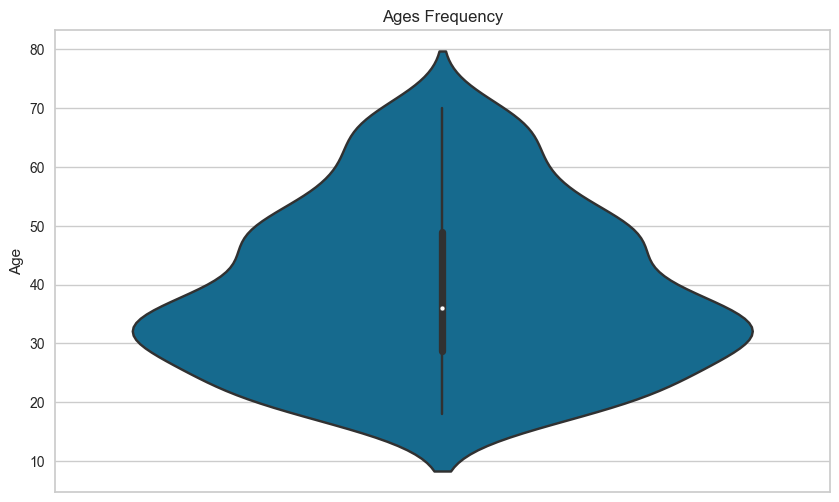

In [10]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

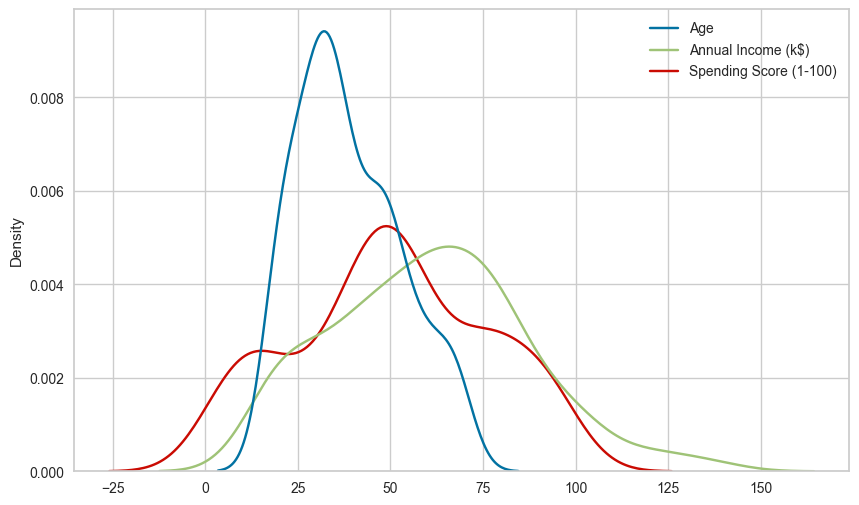

In [11]:
sns.kdeplot(data=df);

In [12]:
df_1 = df.copy()
df_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_1['Gender']= label_encoder.fit_transform(df_1['Gender'])
  
df_1['Gender'].unique()

array([1, 0])

In [14]:
df_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [15]:
df_1['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

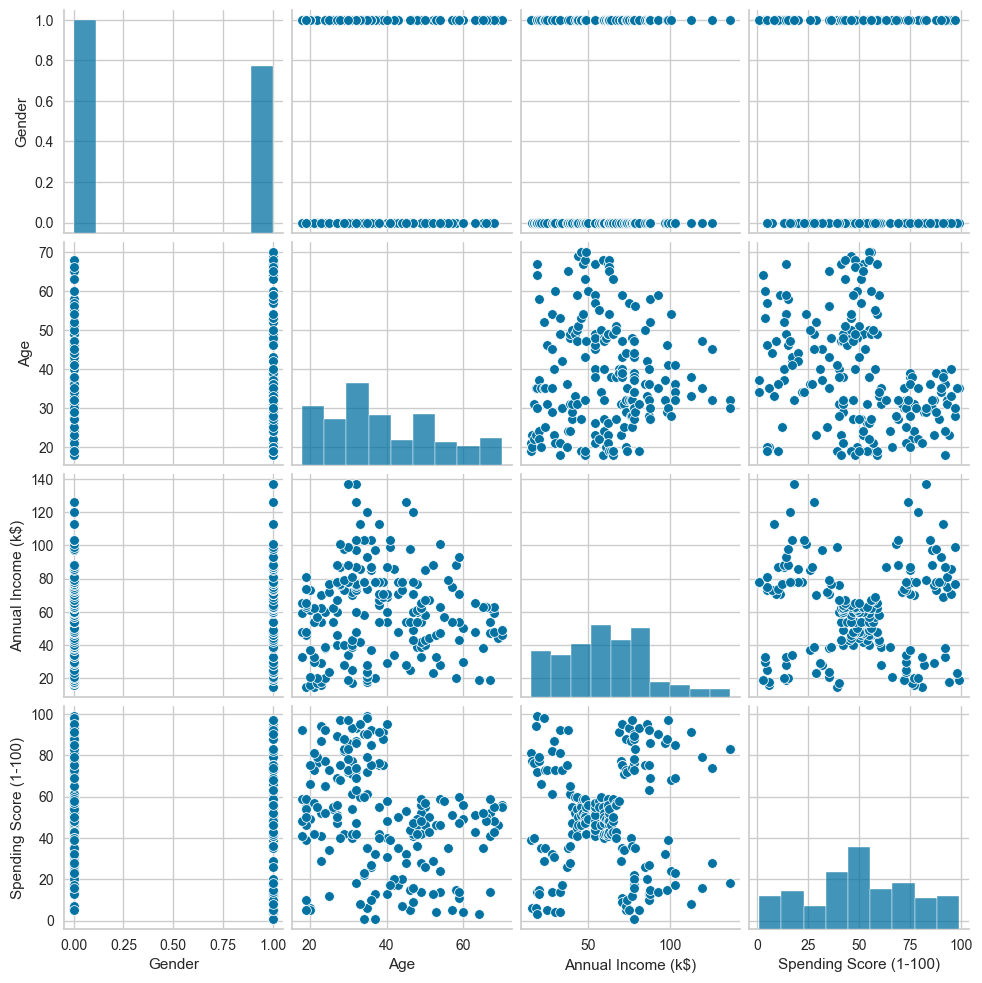

In [16]:
sns.pairplot(df_1);

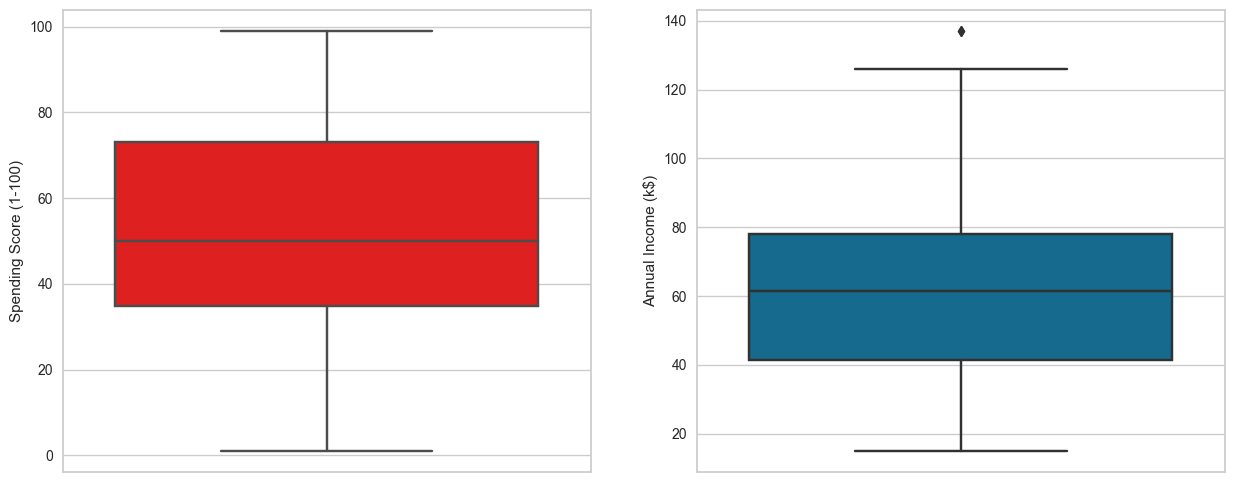

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

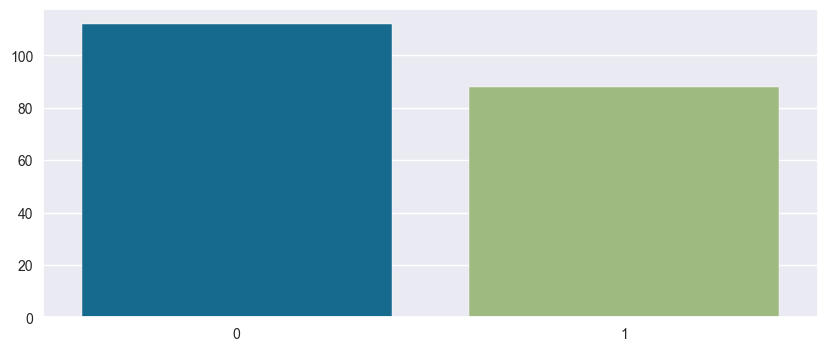

In [18]:
genders = df_1.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values,)
plt.show()

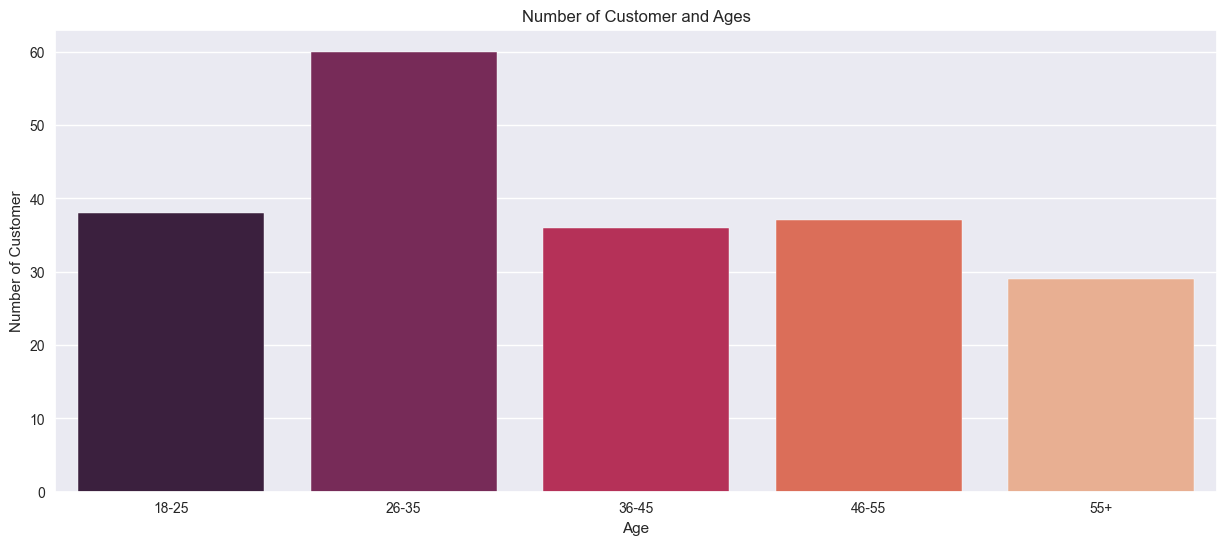

In [19]:
age18_25 = df_1.Age[(df.Age <= 25) & (df_1.Age >= 18)]
age26_35 = df_1.Age[(df.Age <= 35) & (df_1.Age >= 26)]
age36_45 = df_1.Age[(df.Age <= 45) & (df_1.Age >= 36)]
age46_55 = df_1.Age[(df.Age <= 55) & (df_1.Age >= 46)]
age55above = df.Age[df_1.Age >= 56]
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

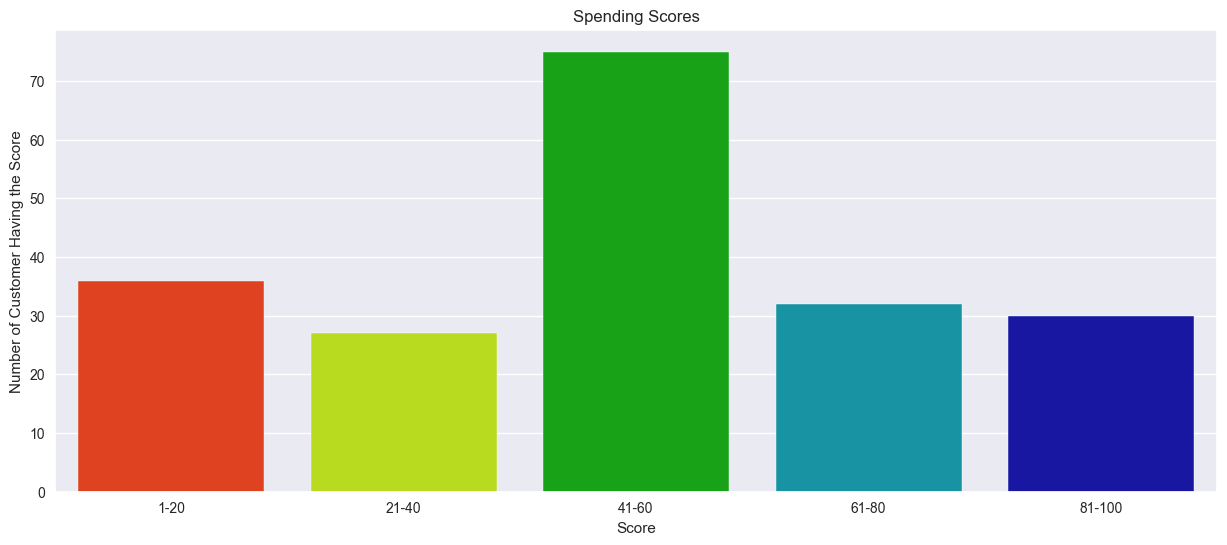

In [20]:
ss1_20 = df_1["Spending Score (1-100)"][(df_1["Spending Score (1-100)"] >= 1) & (df_1["Spending Score (1-100)"] <= 20)]
ss21_40 = df_1["Spending Score (1-100)"][(df_1["Spending Score (1-100)"] >= 21) & (df_1["Spending Score (1-100)"] <= 40)]
ss41_60 = df_1["Spending Score (1-100)"][(df_1["Spending Score (1-100)"] >= 41) & (df_1["Spending Score (1-100)"] <= 60)]
ss61_80 = df_1["Spending Score (1-100)"][(df_1["Spending Score (1-100)"] >= 61) & (df_1["Spending Score (1-100)"] <= 80)]
ss81_100 = df_1["Spending Score (1-100)"][(df_1["Spending Score (1-100)"] >= 81) & (df_1["Spending Score (1-100)"] <= 100)]
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

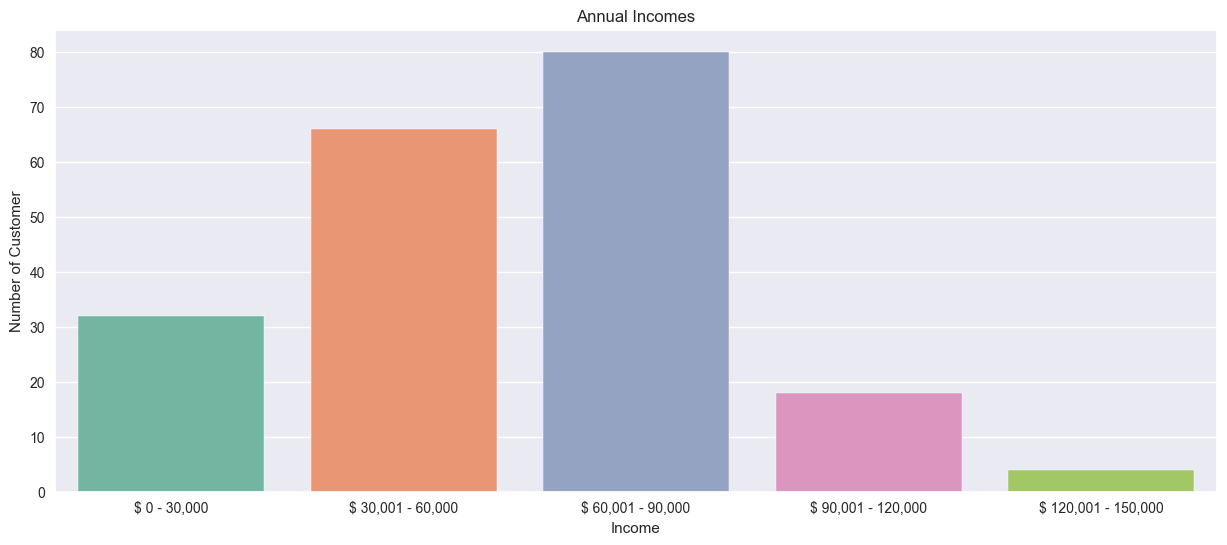

In [21]:
ai0_30 = df_1["Annual Income (k$)"][(df_1["Annual Income (k$)"] >= 0) & (df_1["Annual Income (k$)"] <= 30)]
ai31_60 = df_1["Annual Income (k$)"][(df_1["Annual Income (k$)"] >= 31) & (df_1["Annual Income (k$)"] <= 60)]
ai61_90 = df_1["Annual Income (k$)"][(df_1["Annual Income (k$)"] >= 61) & (df_1["Annual Income (k$)"] <= 90)]
ai91_120 = df_1["Annual Income (k$)"][(df_1["Annual Income (k$)"] >= 91) & (df_1["Annual Income (k$)"] <= 120)]
ai121_150 = df_1["Annual Income (k$)"][(df_1["Annual Income (k$)"] >= 121) & (df_1["Annual Income (k$)"] <= 150)]
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

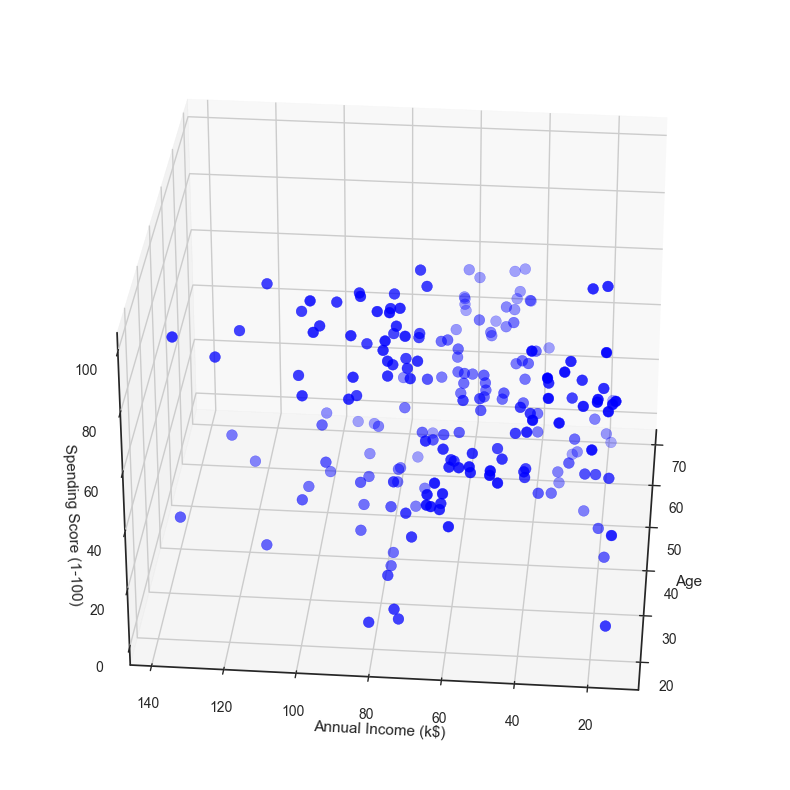

In [22]:
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_1.Age, df_1["Annual Income (k$)"], df_1["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score - X1

#### *i. Create a new dataset with two variables of your choice*

In [23]:
df_1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [24]:
X1 = df_1.drop(["Gender", "Annual Income (k$)"], axis = 1)

In [25]:
X1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [26]:
K_means_X1 = KMeans(n_clusters= 5, random_state=42)

In [27]:
K_means_X1.fit_predict(X1) # Burada ki degerler bilgisayara gore degisir.

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2])

In [28]:
X1["Classes"] = K_means_X1.labels_
X1.head(10)

,Age,Spending Score (1-100),Classes
0,19,39,3
1,21,81,2
2,20,6,4
3,23,77,2
4,31,40,1
5,22,76,2
6,35,6,4
7,23,94,2
8,64,3,4
9,30,72,2


In [29]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [30]:
X1 = X1.drop("Classes", axis = 1)

In [31]:
hopkins(X1, X1.shape[0]) # 0.5 ustu dek duze dagilim demektir. bu durum istedigimiz bir sey degildir.
# sifiri yakinsama ister datamiz kumelemeye uygundur

0.2871431728543278

In [32]:
hopkins(X1, 60)

0.32932078982441454

#### *ii. Determine optimal number of clusters*

In [33]:
ssd = []

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X1)
    ssd.append(model.inertia_)

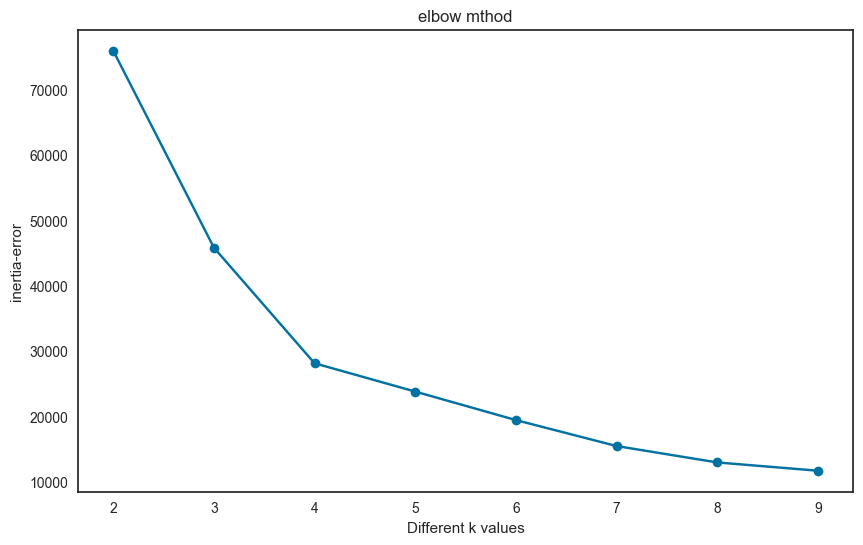

In [34]:
plt.plot(K, ssd, "ob-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow mthod")
plt.show()

In [35]:
ssd

[75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23838.24882164619,
 19483.1179104427,
 15514.193134351031,
 13006.483628851023,
 11738.020296954506]

In [36]:
pd.Series(ssd).diff()

0             NaN
1   -30108.479394
2   -17675.093049
3    -4327.334745
4    -4355.130911
5    -3968.924776
6    -2507.709506
7    -1268.463332
dtype: float64

In [37]:
X1_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x: x+1)

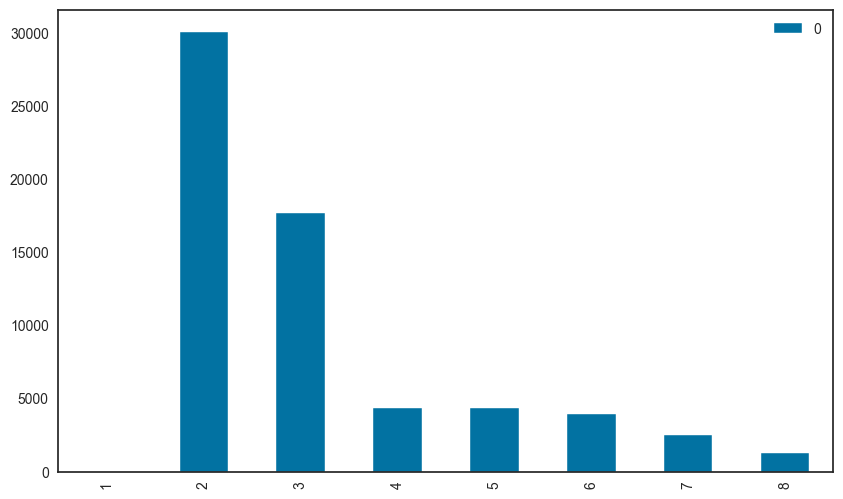

In [38]:
X1_diff.plot(kind = "bar");

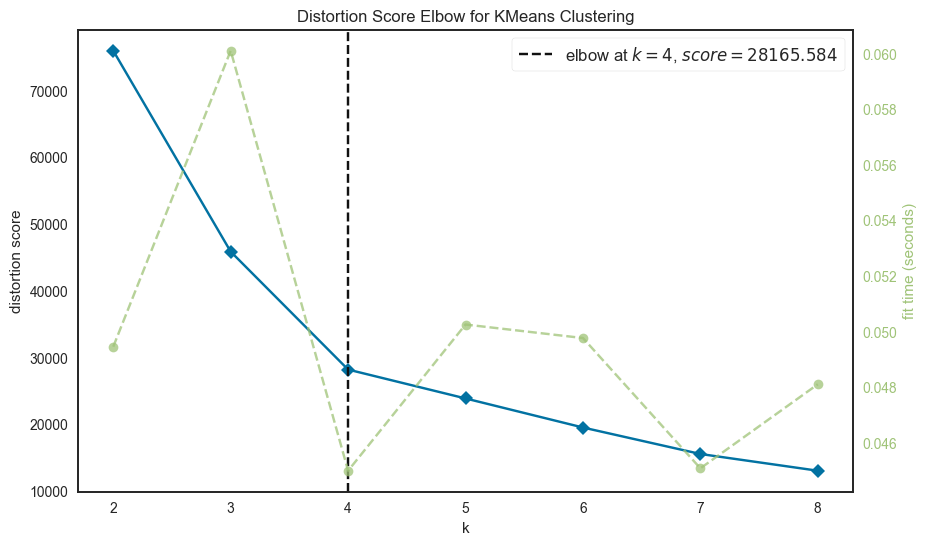

In [39]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.show();

### Why silhouette_score is negative?

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
    
    # 1 e ne kadar yakinsa o kadar iyi fakat iniertia ile birlikte yorumlandiginda  clus = 4
    # bir nesnenin kendi kumesine ne kadar benzediginin bir olcusudur.

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


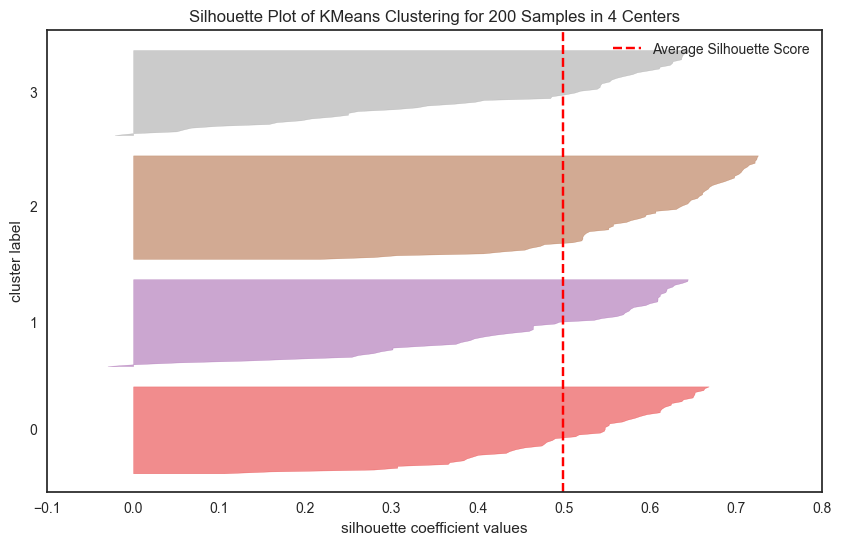

In [42]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

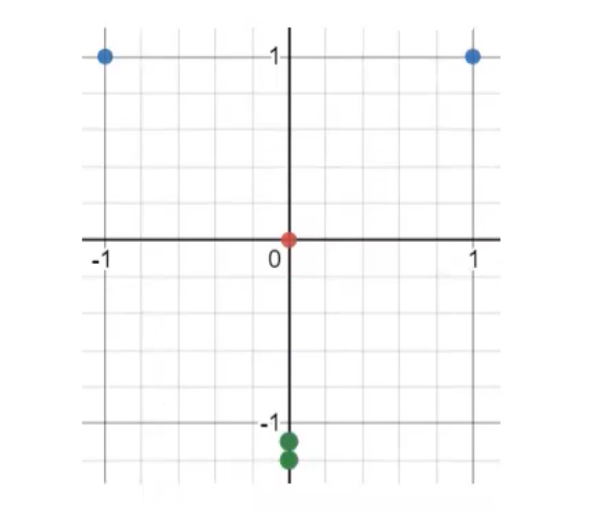

__Silhouette Score-->__ (1-√2) / √2 = -0.29

#### *iii. Apply K Means*

In [43]:
from sklearn.cluster import KMeans
from sklearn import metrics

def KMeans_Algorithm(dataset, n):
    clustering_KMeans = KMeans(n_clusters= n,init='k-means++', max_iter=300, random_state=0, algorithm = "elkan")
    clustering_KMeans.fit(dataset)
    
    # create data frame to store centroids
    centroids  = clustering_KMeans.cluster_centers_
    
    # add cluster label for each data point
    label = clustering_KMeans.labels_
    df["label"] = label
    
      # evaluation metrics for clustering - inertia and silhouette score
    inertia = clustering_KMeans.inertia_
    silhouette_score = metrics.silhouette_score(dataset, label)
    
    return inertia, label, centroids, silhouette_score

In [44]:
X1 = df[["Age", "Spending Score (1-100)"]].values

Text(0, 0.5, 'Silhouette Score')

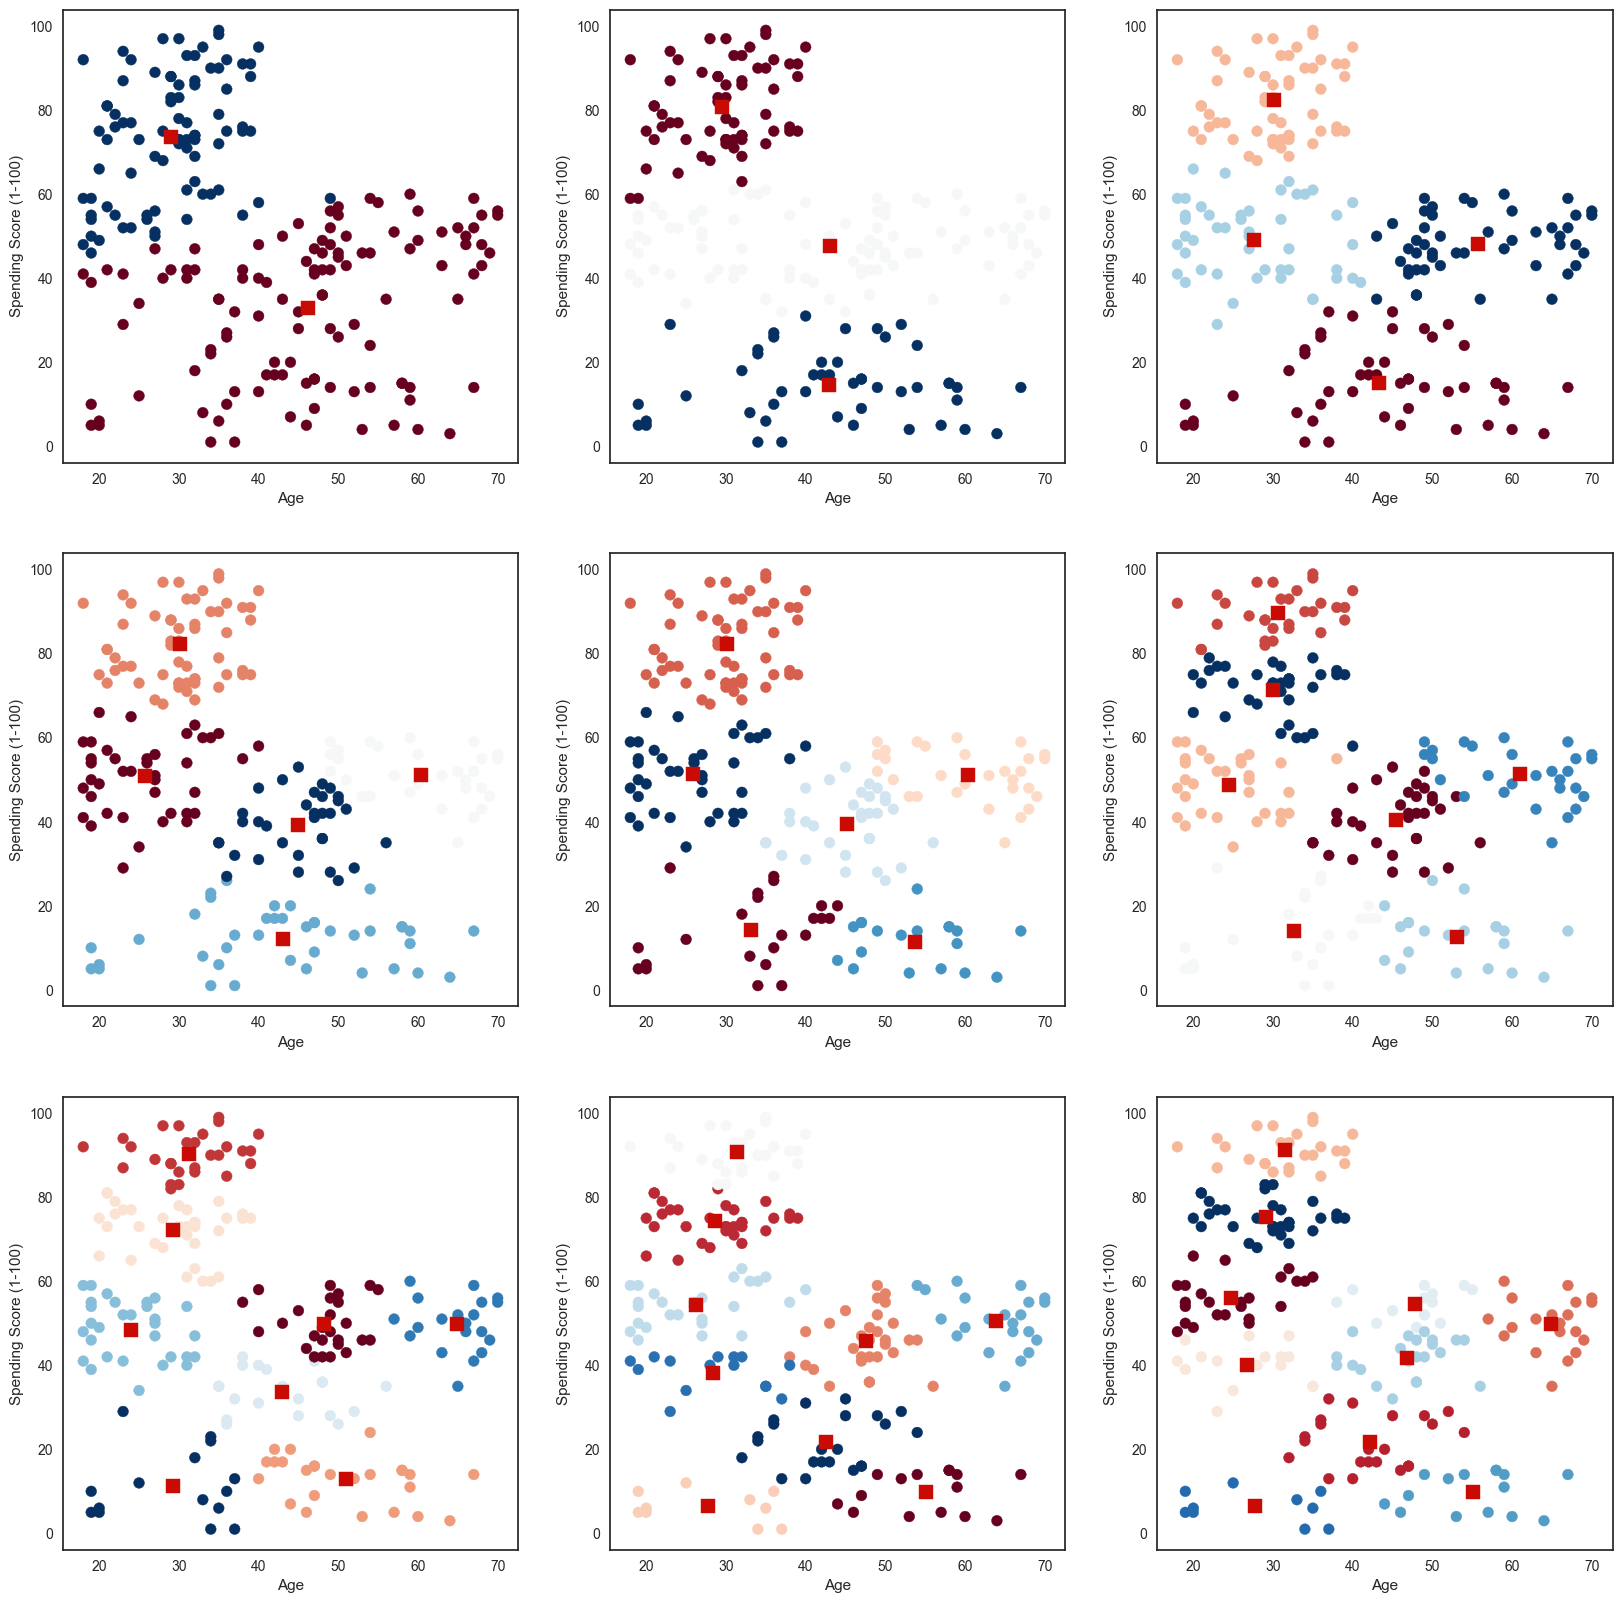

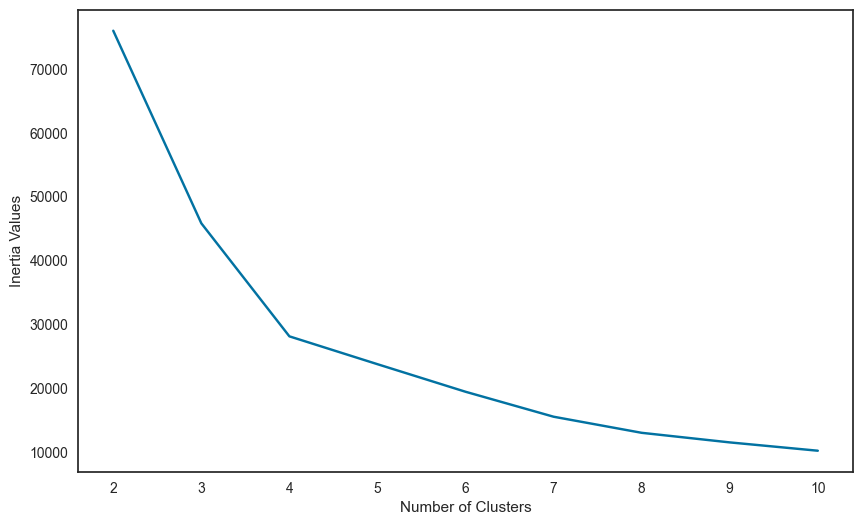

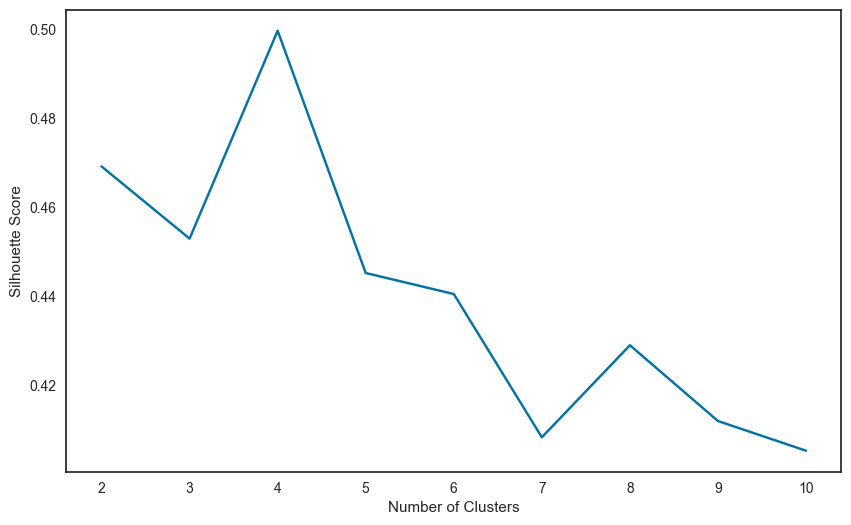

In [45]:
# Spending Score vs. Age by different numbers of clusters
X1_inertia_values = []
X1_silhouette_scores = []
fig1 = plt.figure(figsize=(20,20))
for i in range (2,11):
    X1_inertia, X1_label, X1_centroids, X1_silhouette = KMeans_Algorithm(X1, i)
    X1_inertia_values.append(X1_inertia)
    X1_silhouette_scores.append(X1_silhouette)
    centroids_df = pd.DataFrame(X1_centroids, columns =['X', 'Y'])
    
    sub = fig1.add_subplot(330 + i - 1)
    sub.scatter(df["Age"], df["Spending Score (1-100)"], s = 60, c = df["label"], cmap = "RdBu")
    sub.scatter(centroids_df['X'], centroids_df['Y'], s = 90, marker= ",", color = "r")
    sub.set_xlabel("Age")
    sub.set_ylabel("Spending Score (1-100)")
    
    # plot inertia values against number of clusters
plt.figure(figsize = (10 ,6))
plt.plot(np.arange(2,11) , X1_inertia_values )
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Values")

# plot silhouette scores against number of clusters
plt.figure(figsize=(10,6))
plt.plot(np.arange(2,11), X1_silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
    

#### *iv. Visualizing and Labeling All the Clusters*

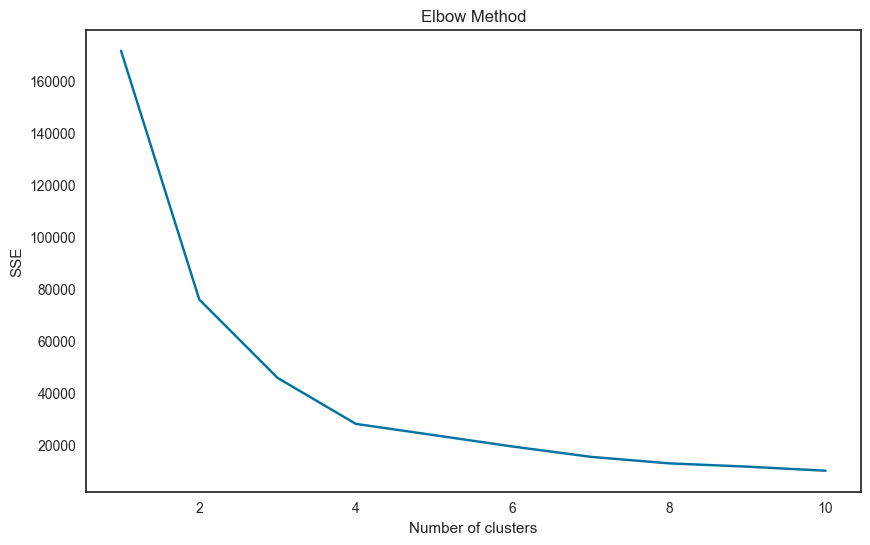

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X1 = df[['Age', 'Spending Score (1-100)']].values
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X1)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

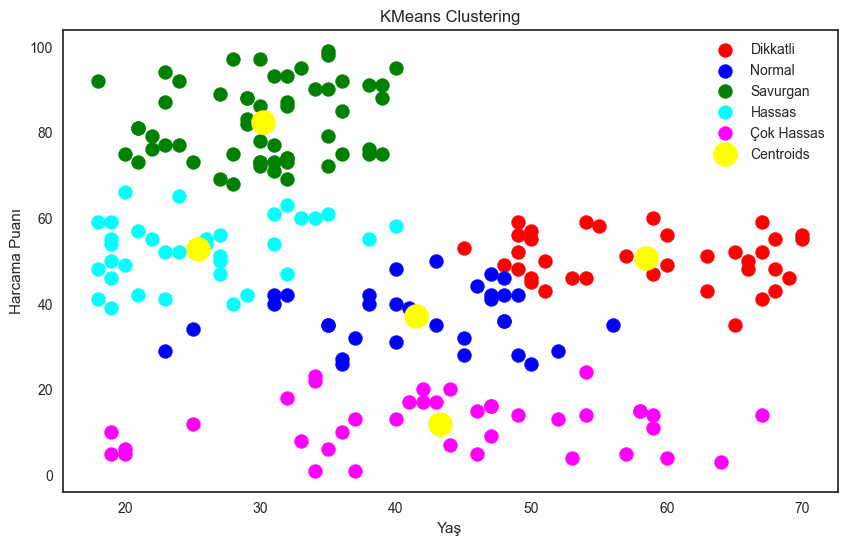

In [47]:
# KMeans with 5 clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X1)
# Visualizing the clusters
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Dikkatli')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Normal')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Savurgan')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Hassas')
plt.scatter(X1[y_kmeans == 4, 0], X1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Çok Hassas')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Yaş')
plt.ylabel('Harcama Puanı')
plt.legend()
plt.show()

### Clustering based on Annual Income and Spending Score - X2

In [48]:
df_1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [49]:
X2 = df_1.drop(["Gender", "Age"], axis = 1)

In [50]:
X2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### *ii. Determine optimal number of clusters*

In [51]:
ssd = []

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X2)
    ssd.append(model.inertia_)

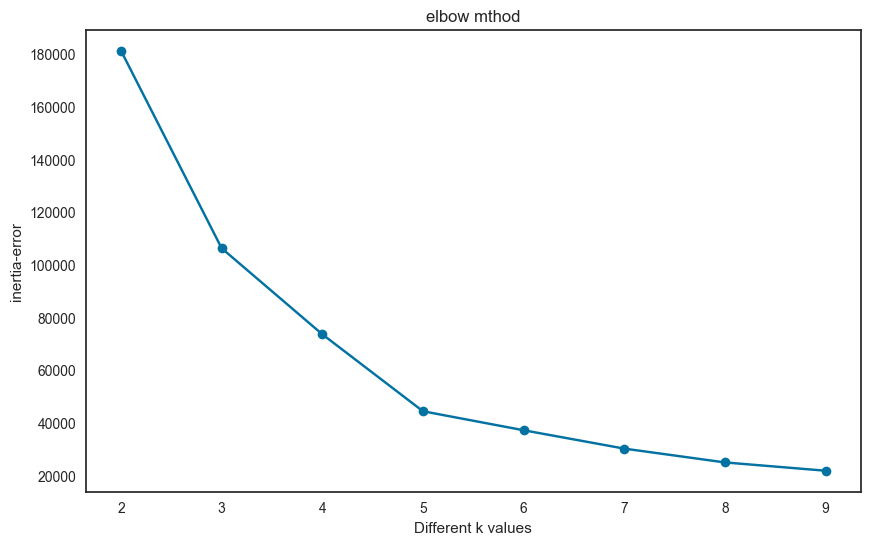

In [52]:
plt.plot(K, ssd, "ob-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow mthod")
plt.show()

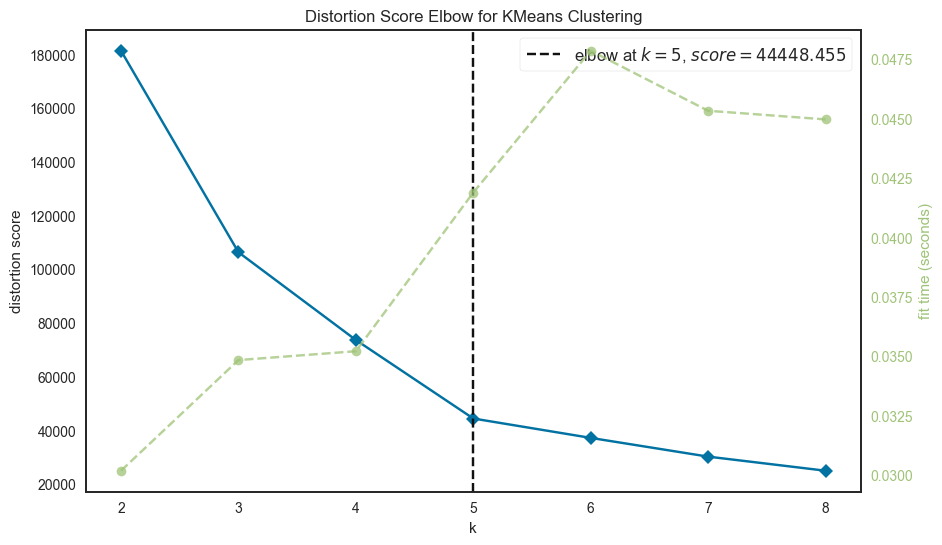

In [53]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

In [54]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
    
    # 1 e ne kadar yakinsa o kadar iyi fakat inertia ile birlikte yorumlandiginda  clus = 5
    # bir nesnenin kendi kumesine ne kadar benzediginin bir olcusudur.

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


#### *iii. Apply K Means*

In [55]:
def KMeans_Algorithm(dataset, n):
    clustering_KMeans = KMeans(n_clusters= n,init='k-means++', max_iter=300, random_state=0, algorithm = "elkan")
    clustering_KMeans.fit(dataset)
    
    # create data frame to store centroids
    centroids  = clustering_KMeans.cluster_centers_
    
    # add cluster label for each data point
    label = clustering_KMeans.labels_
    df["label"] = label
    
      # evaluation metrics for clustering - inertia and silhouette score
    inertia = clustering_KMeans.inertia_
    silhouette_score = metrics.silhouette_score(dataset, label)
    
    return inertia, label, centroids, silhouette_score

Text(0, 0.5, 'Silhouette Score')

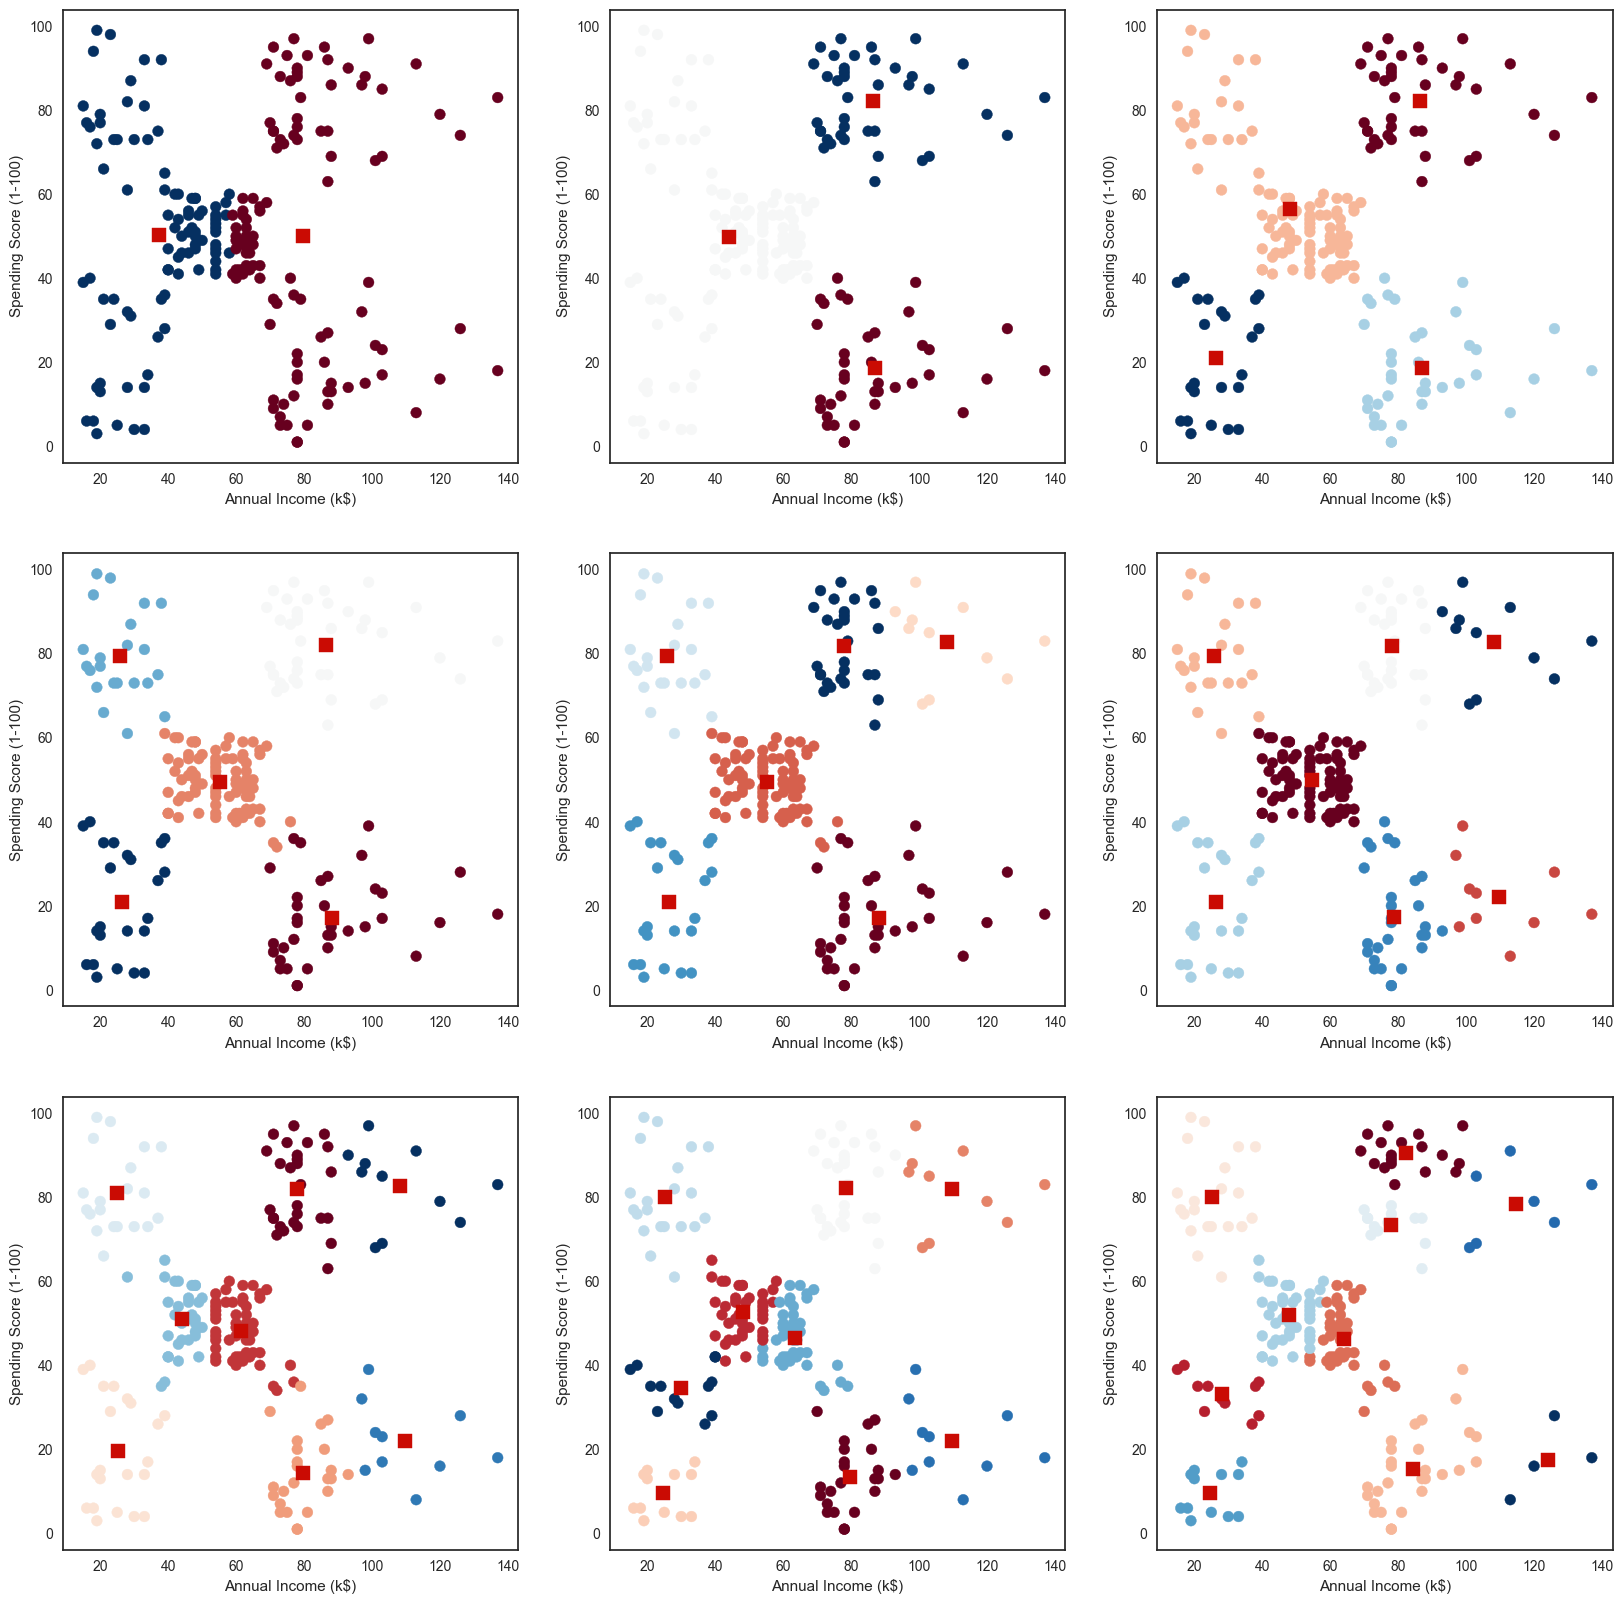

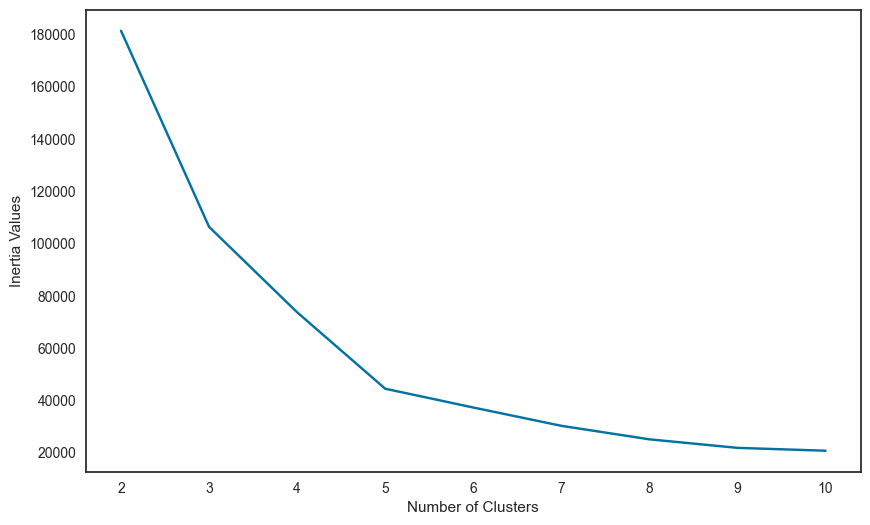

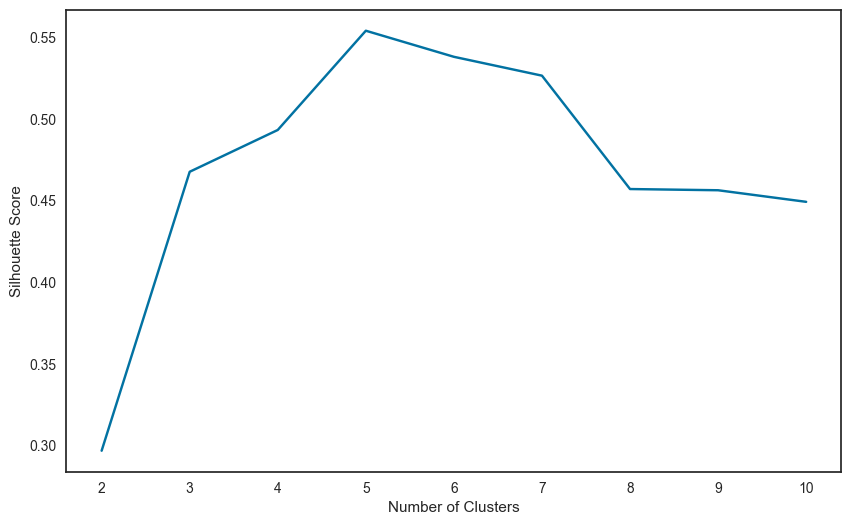

In [56]:
# Spending Score vs. Annual Income by different numbers of clusters
X2_inertia_values = []
X2_silhouette_scores = []
fig2 = plt.figure(figsize=(20,20))
for i in range (2,11):
    X2_inertia, X2_label, X2_centroids, X2_silhouette  = KMeans_Algorithm(X2, i)
    X2_inertia_values.append(X2_inertia)
    X2_silhouette_scores.append(X2_silhouette)
    centroids_df = pd.DataFrame(X2_centroids, columns =['X', 'Y'])
    sub = fig2.add_subplot(330 + i - 1)
    sub.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], s = 60, c = df["label"], cmap = "RdBu")
    sub.scatter(centroids_df['X'], centroids_df['Y'], s = 90, marker= ",", color = "r")
    
    sub.set_xlabel("Annual Income (k$)")
    sub.set_ylabel("Spending Score (1-100)")
    

# plot inertia values against number of clusters
plt.figure(figsize = (10 ,6))
plt.plot(np.arange(2, 11) , X2_inertia_values , '-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Values")

# plot inertia values against number of clusters
plt.figure(figsize=(10,6))
plt.plot(np.arange(2,11) , X2_silhouette_scores, '-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
  

#### *iv. Visualizing and Labeling All the Clusters*

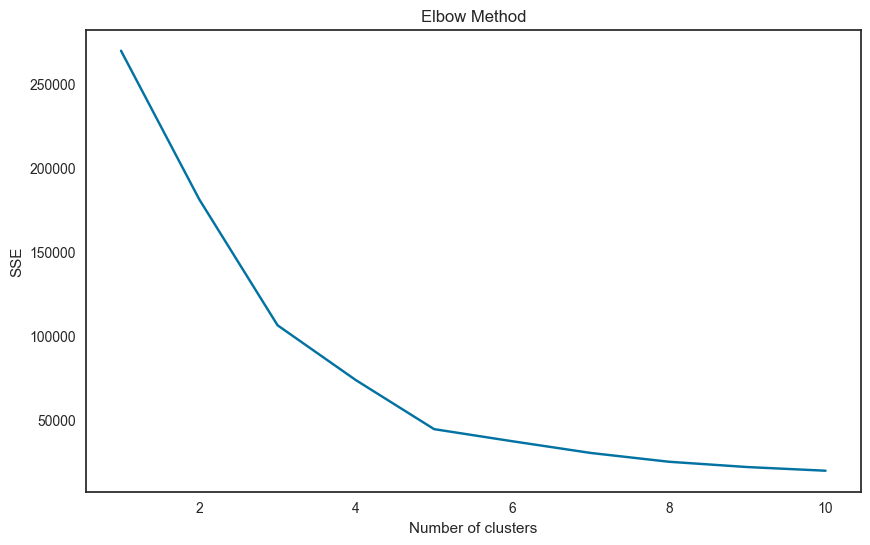

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X2)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

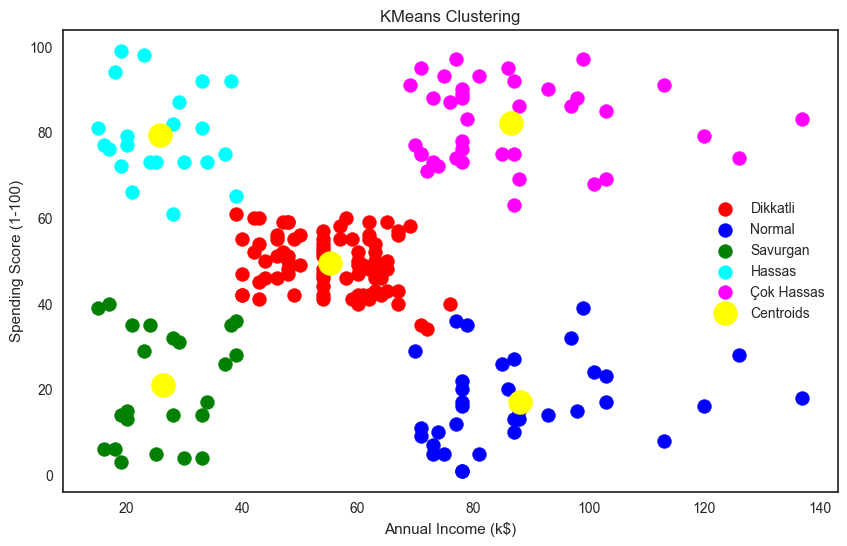

In [58]:
# KMeans with 5 clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X2)
# Visualizing the clusters
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Dikkatli')
plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Normal')
plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Savurgan')
plt.scatter(X2[y_kmeans == 3, 0], X2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Hassas')
plt.scatter(X2[y_kmeans == 4, 0], X2[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Çok Hassas')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Hierarchical Clustering

In [59]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [60]:
hc_ward = linkage (y= df_1, method ="ward") #varyansa göre
hc_complete = linkage (df_1, "complete") #en uzak noktaya göre
hc_average = linkage (df_1, "average") #ortalamaya göre
hc_single= linkage(df_1 ,"single") #en yakın noktaya göre

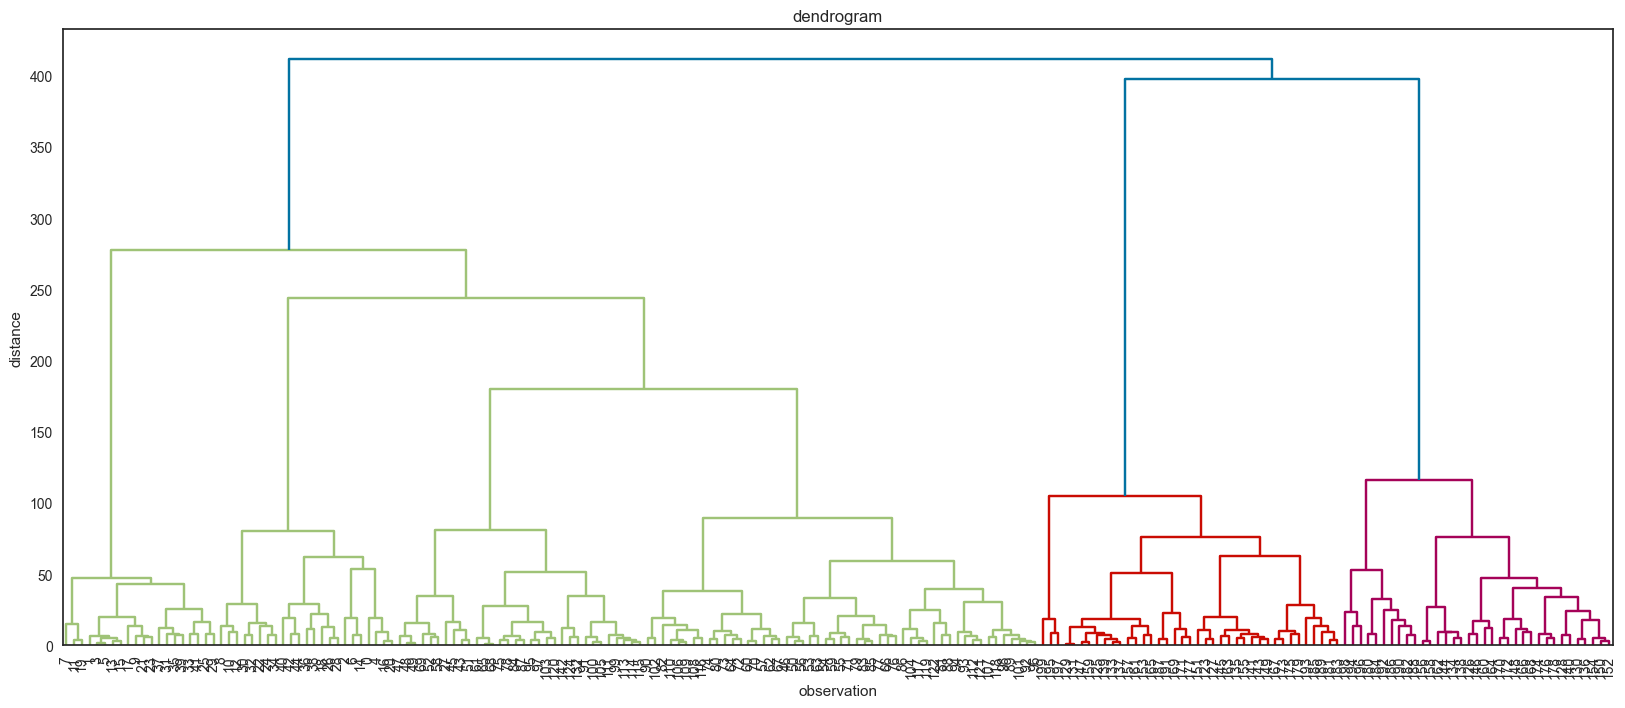

In [61]:
plt.figure(figsize= (20,8))
plt.title("dendrogram")
plt.xlabel("observation")
plt.ylabel("distance")
dendrogram (hc_ward, leaf_font_size=10);

### *i. Determine optimal number of clusters using Dendogram*

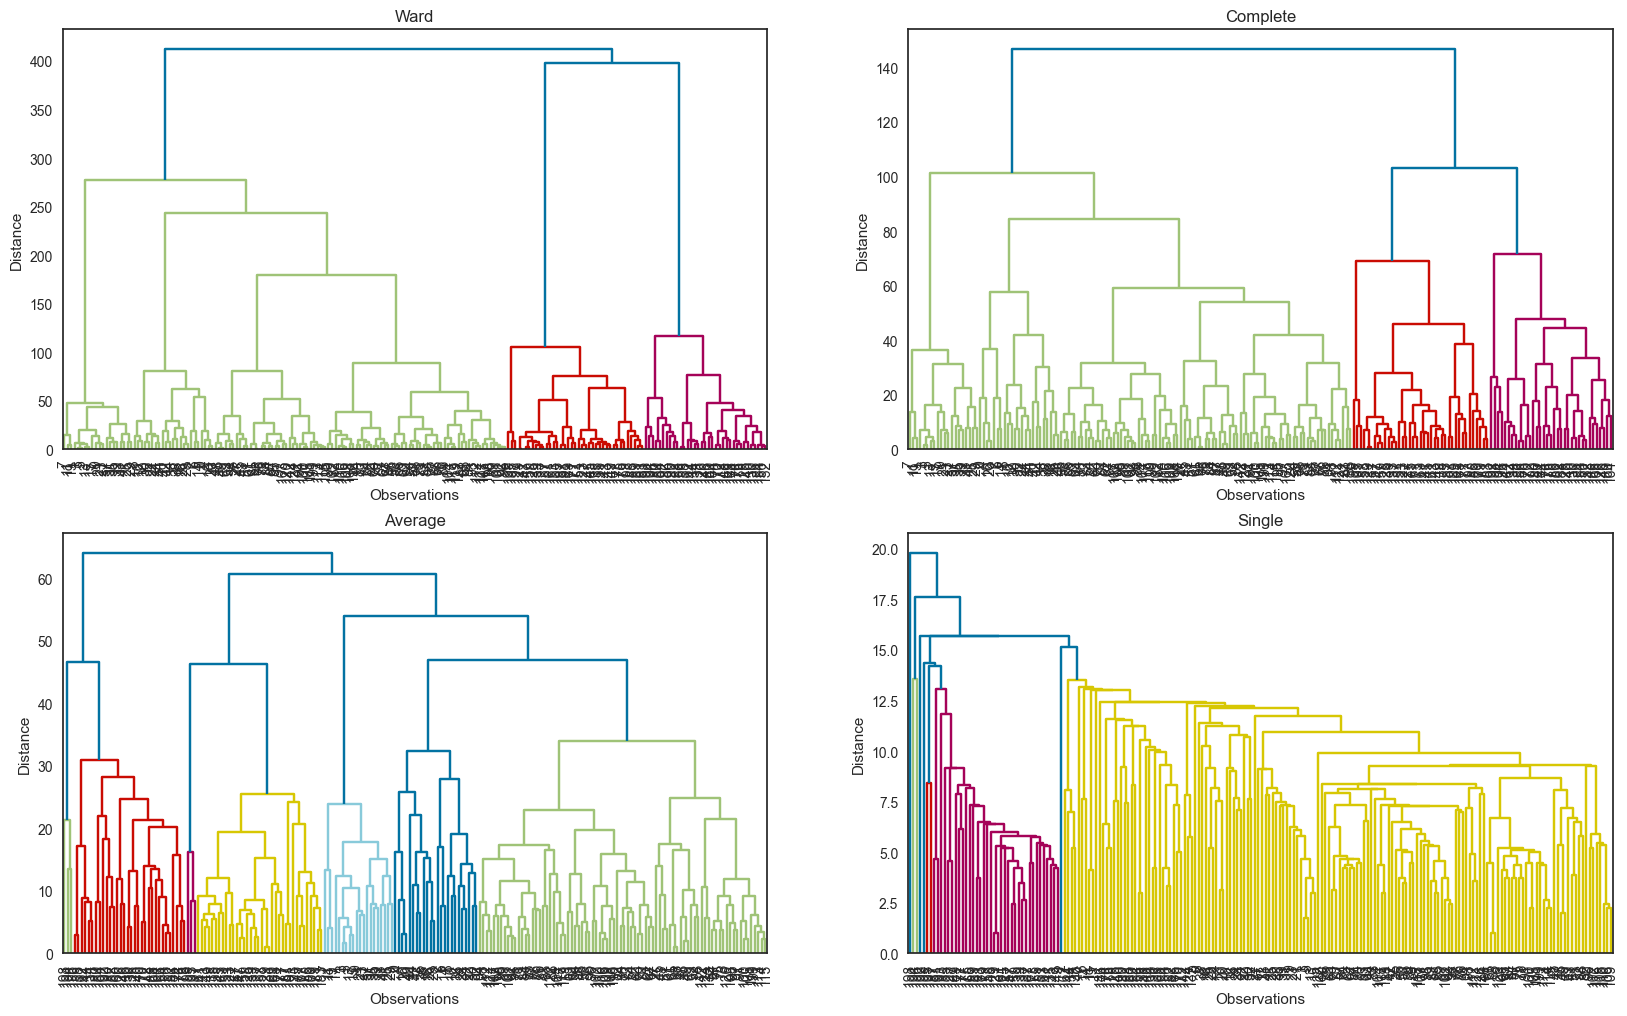

In [62]:
plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)
plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)
plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Clustering based on Age and Spending Score- X1

In [63]:
hc_ward = linkage (y= X1, method ="ward") #varyansa göre
hc_complete = linkage (X1, "complete") #en uzak noktaya göre
hc_average = linkage (X1, "average") #ortalamaya göre
hc_single= linkage(X1 ,"single") #en yakın noktaya göre

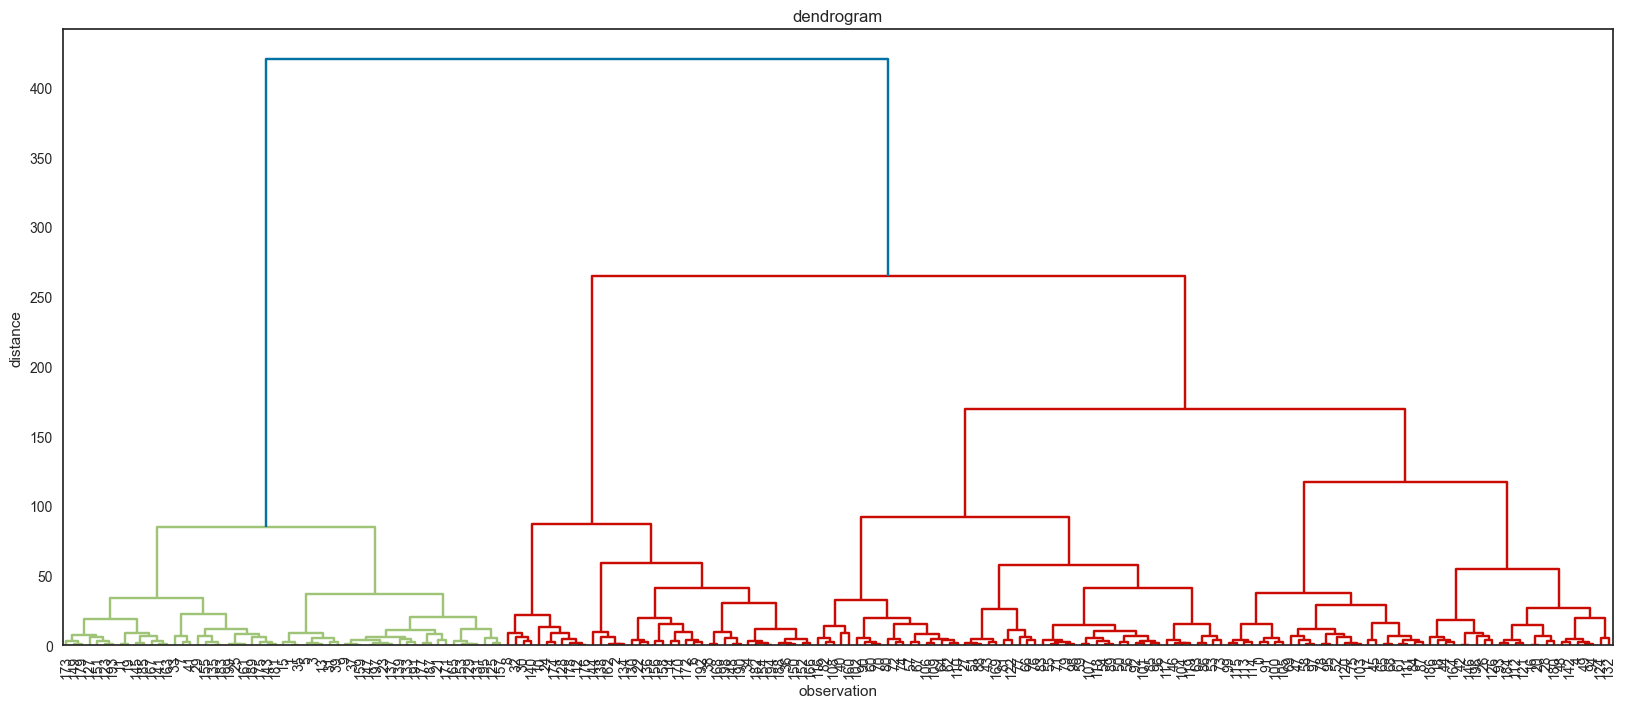

In [64]:
plt.figure(figsize= (20,8))
plt.title("dendrogram")
plt.xlabel("observation")
plt.ylabel("distance")
dendrogram (hc_ward, leaf_font_size=10);

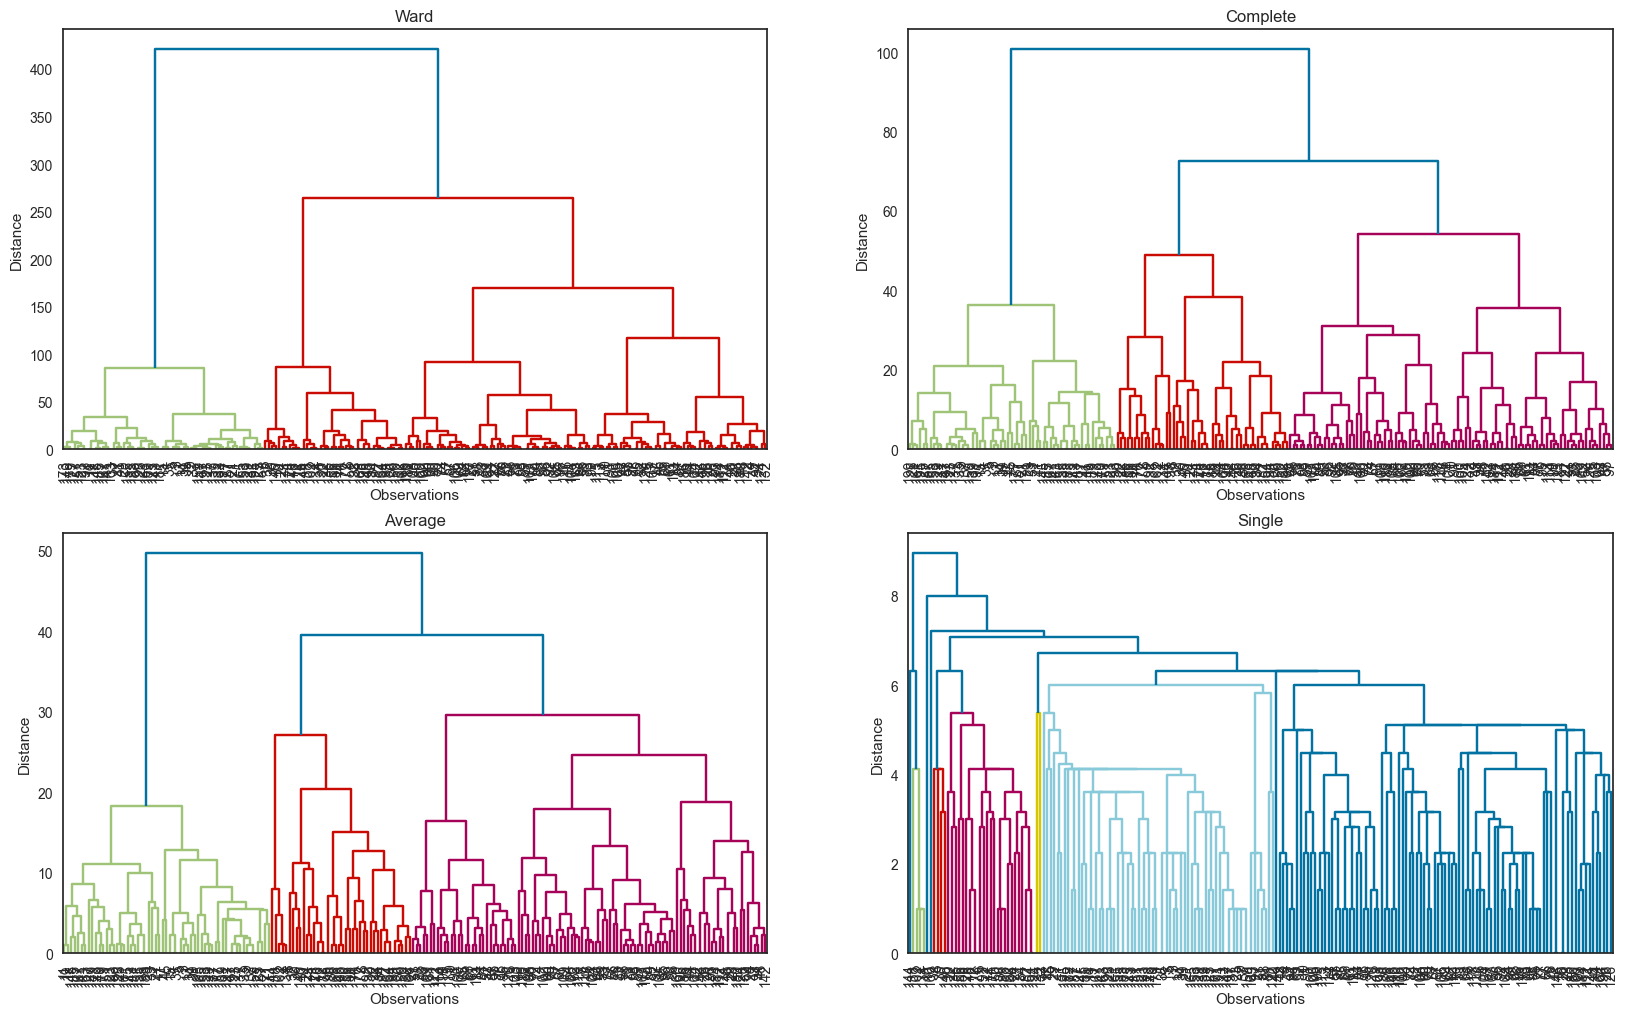

In [65]:
plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)
plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)
plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

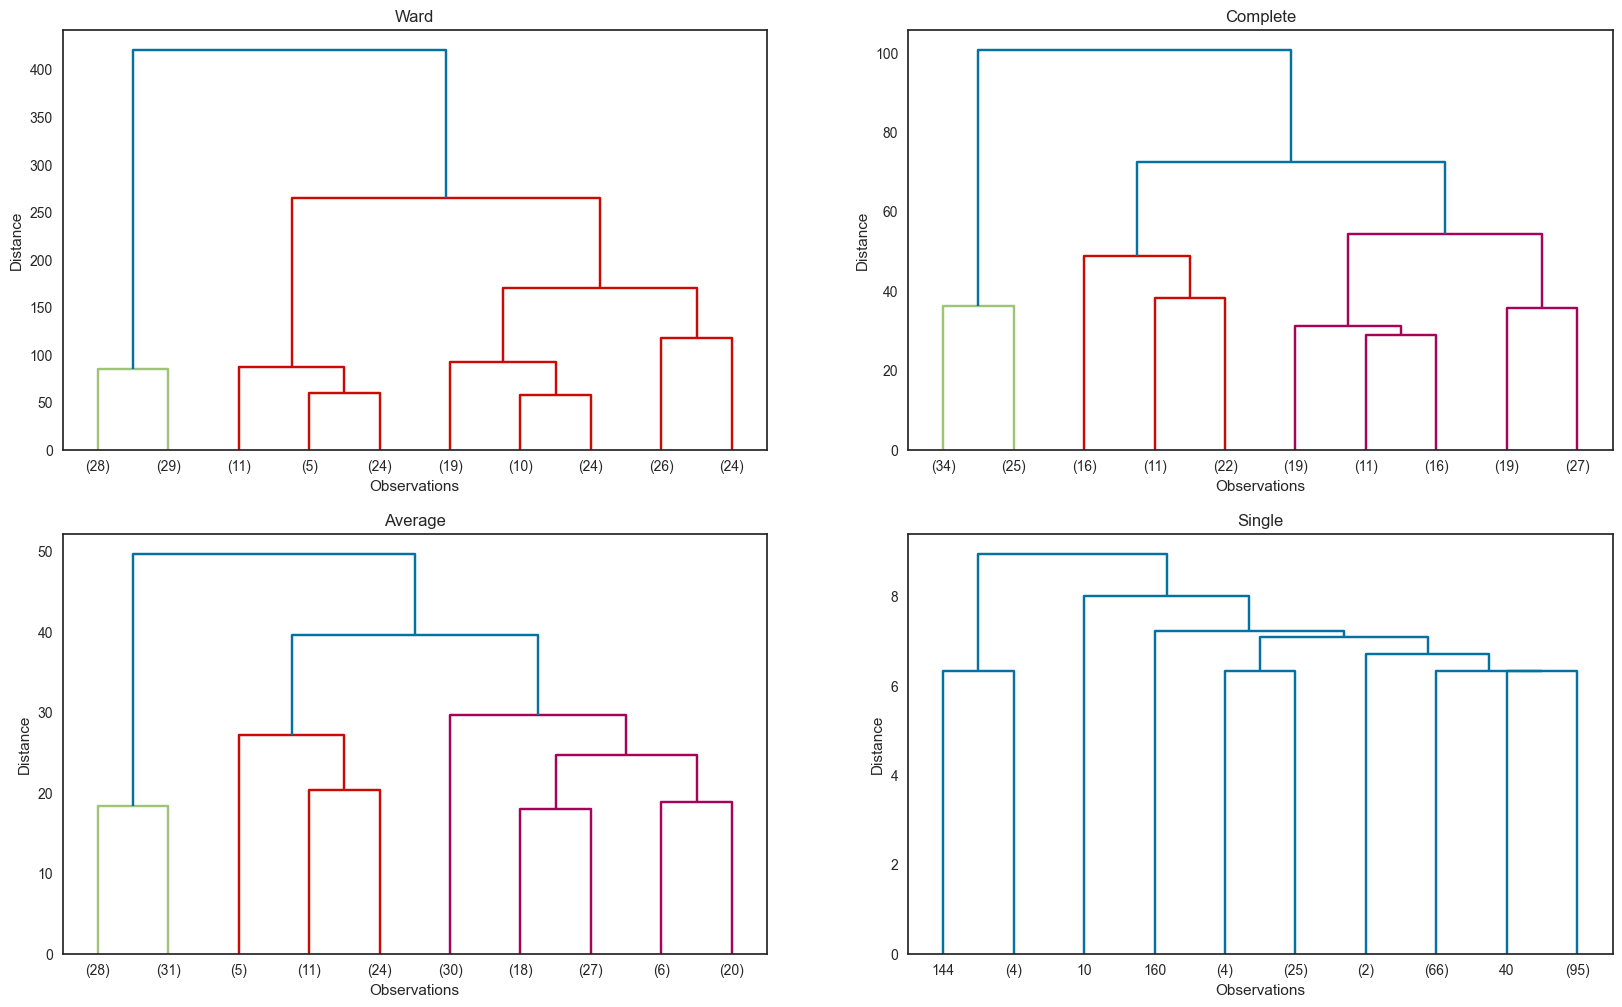

In [66]:
plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);  # p en son dallarda oluşacak küme sayısı
# truncate_mode='lastp'  ?????

## Clustering based on Annual Income and Spending Score- X2

In [67]:
hc_ward = linkage (y= X2, method ="ward") #varyansa göre
hc_complete = linkage (X2, "complete") #en uzak noktaya göre
hc_average = linkage (X2, "average") #ortalamaya göre
hc_single= linkage(X2 ,"single") #en yakın noktaya göre

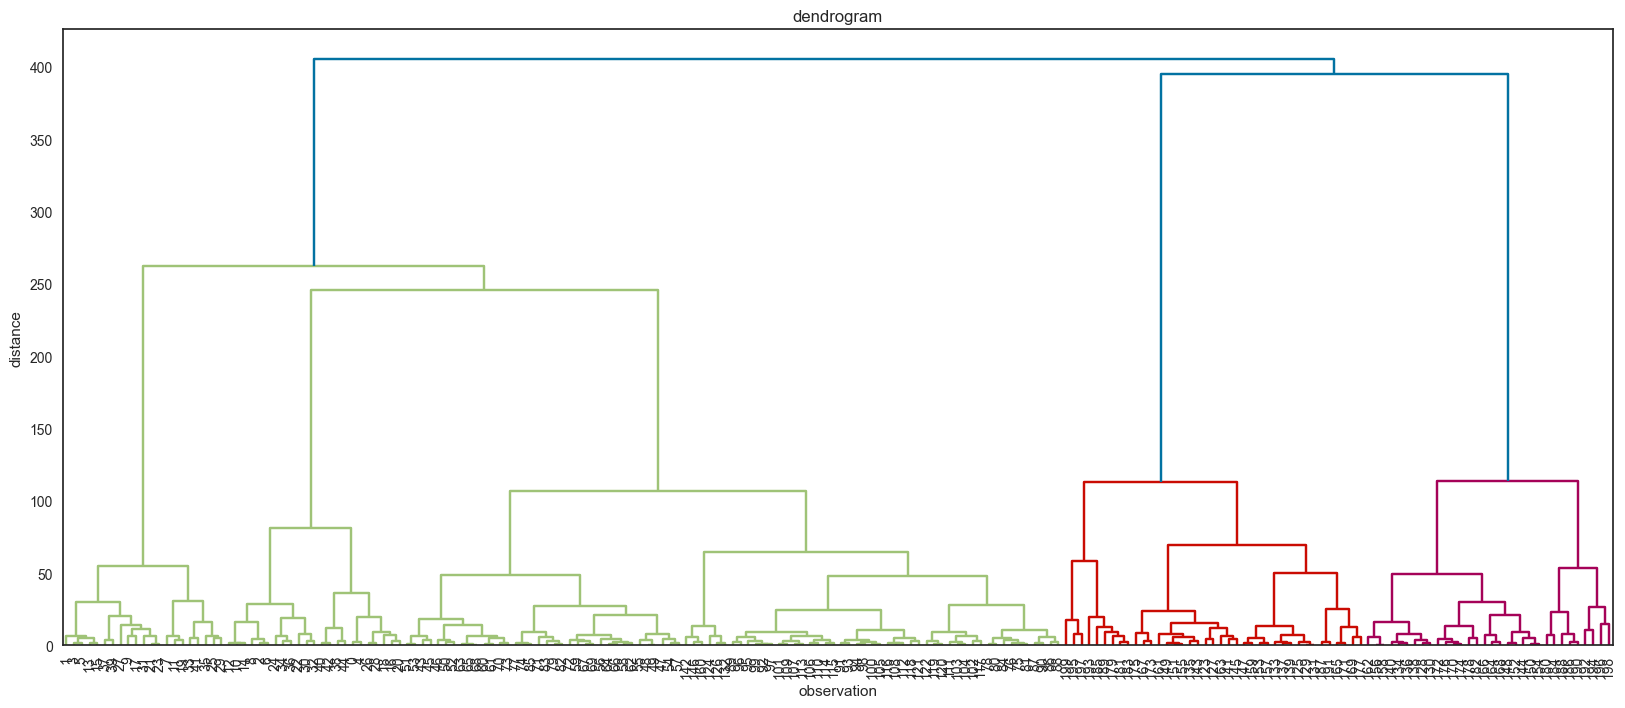

In [68]:
plt.figure(figsize= (20,8))
plt.title("dendrogram")
plt.xlabel("observation")
plt.ylabel("distance")
dendrogram (hc_ward, leaf_font_size=10);

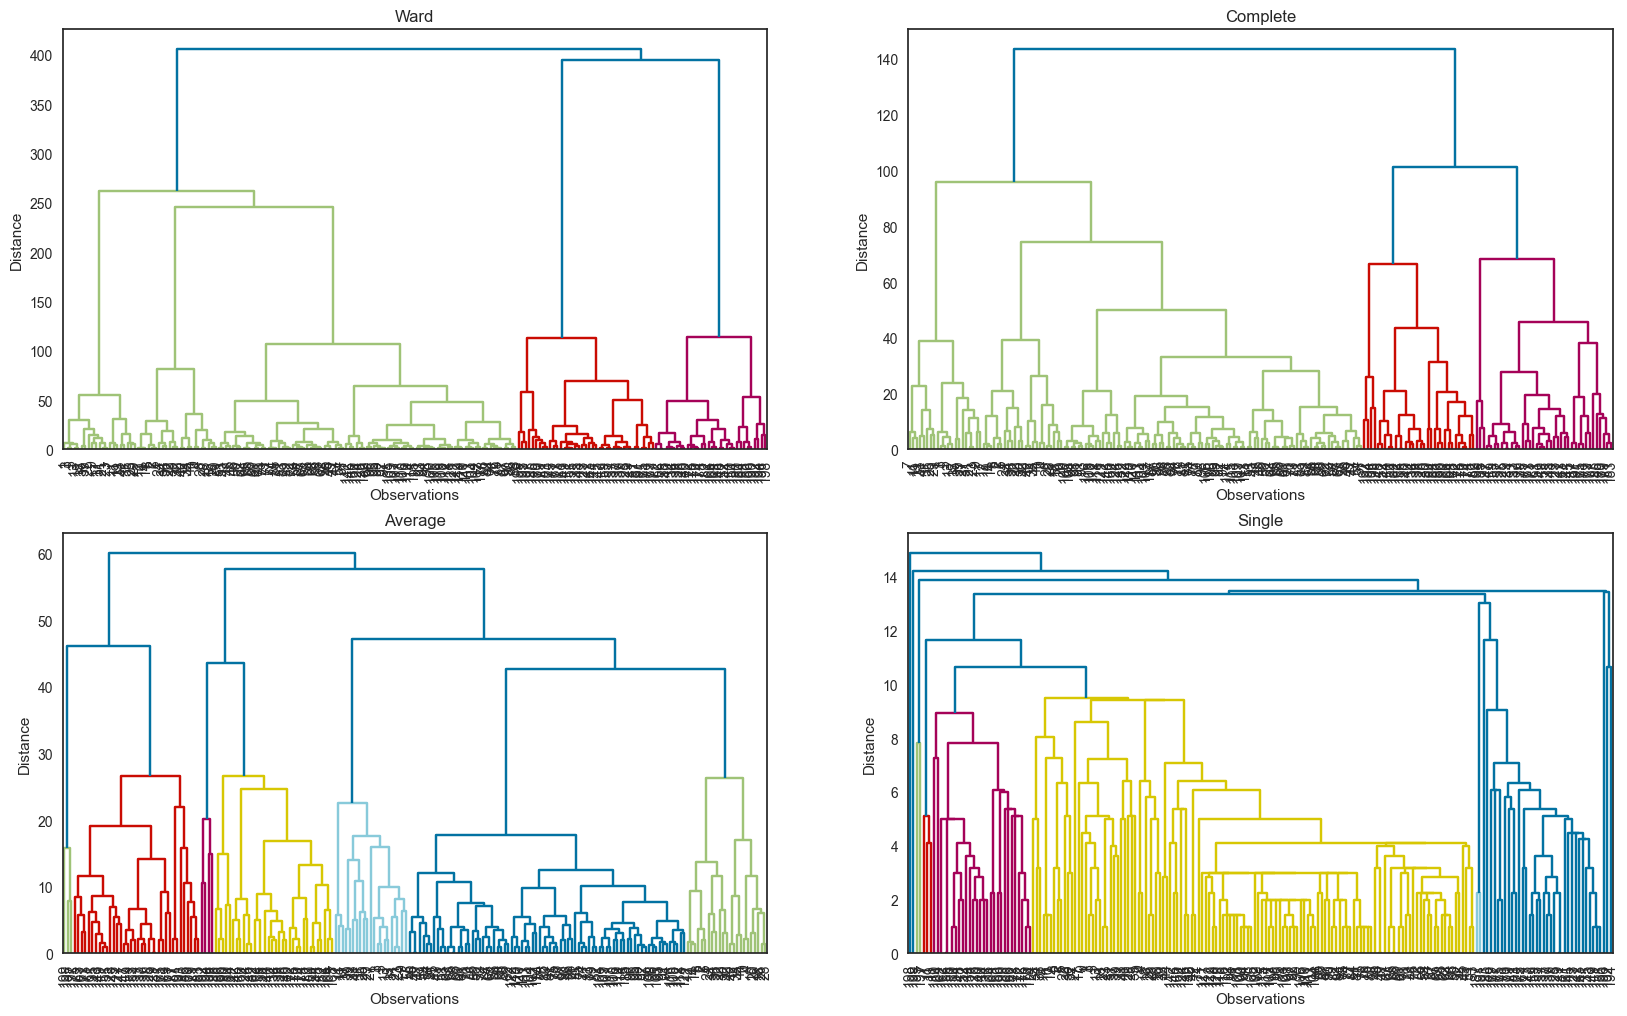

In [69]:
plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)
plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)
plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

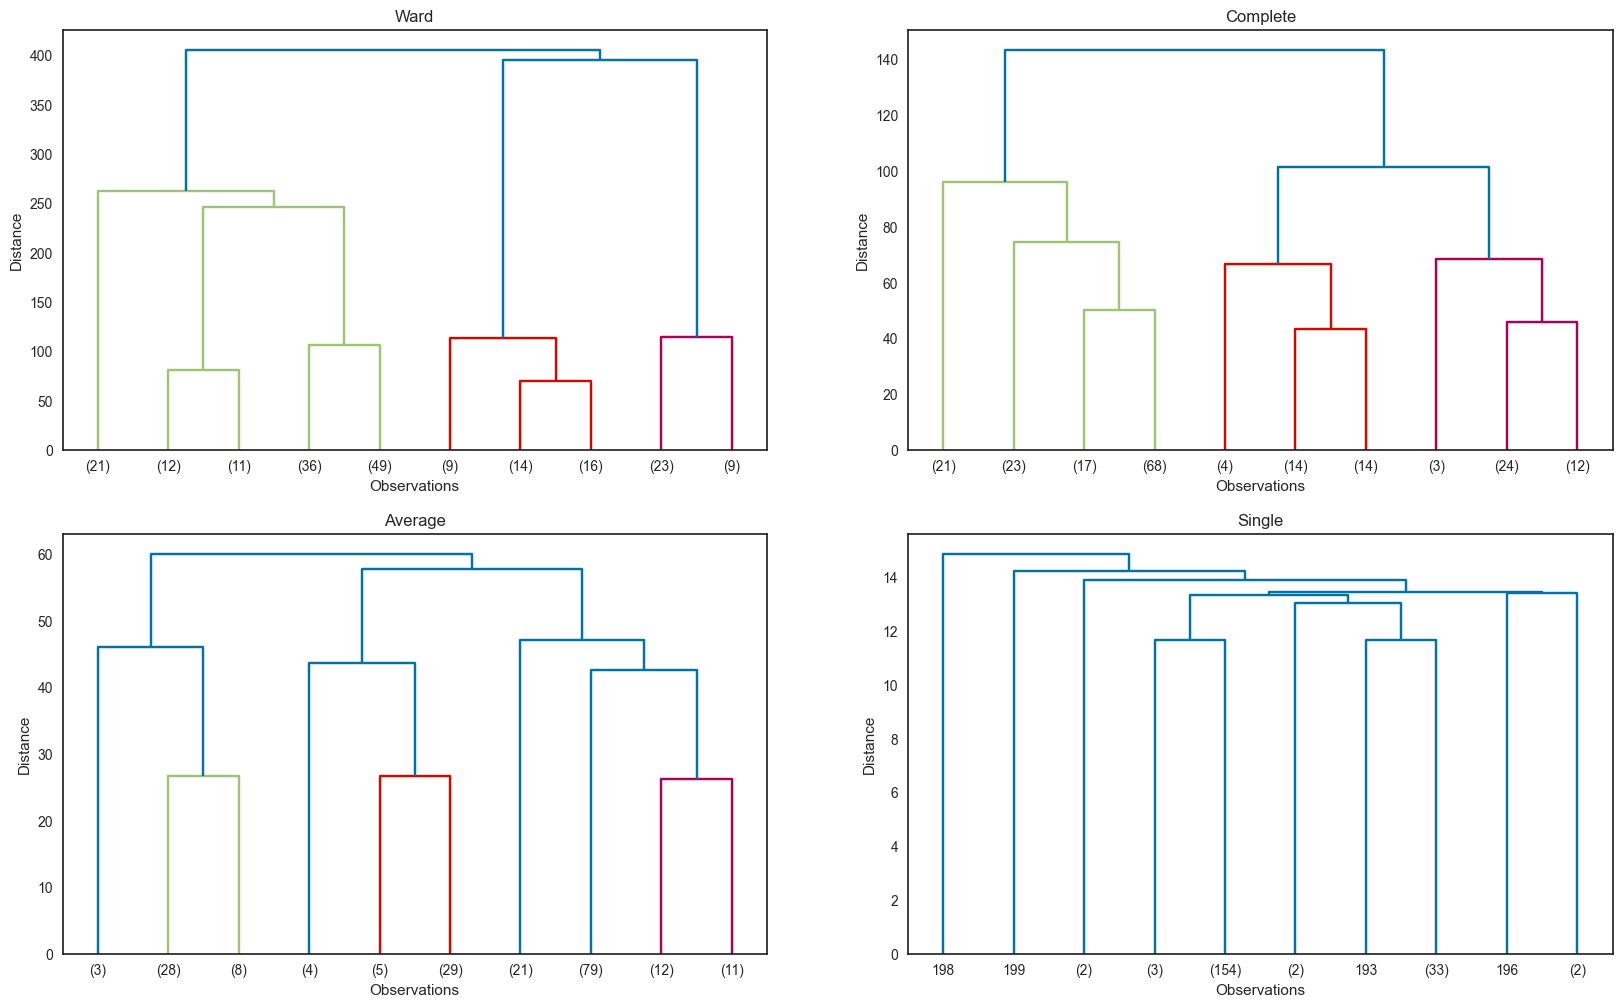

In [70]:
plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);  # p en son dallarda oluşacak küme sayısı
# truncate_mode='lastp'  ?????

### ii. *Apply Agglomerative Clustering*

In [71]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df_1)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(df_1, model.labels_)})

f'Silhouette Score for {2} clusters {0.29916602844367}
f'Silhouette Score for {3} clusters {0.3812859576468096}
f'Silhouette Score for {4} clusters {0.4102091359195185}
f'Silhouette Score for {5} clusters {0.43997527212476695}
f'Silhouette Score for {6} clusters {0.4428008535928764}
f'Silhouette Score for {7} clusters {0.42593881050851595}
f'Silhouette Score for {8} clusters {0.4223297424559345}
f'Silhouette Score for {9} clusters {0.37773214836148283}


In [72]:
model1 = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage = "ward") #
model1.fit_predict(df_1)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

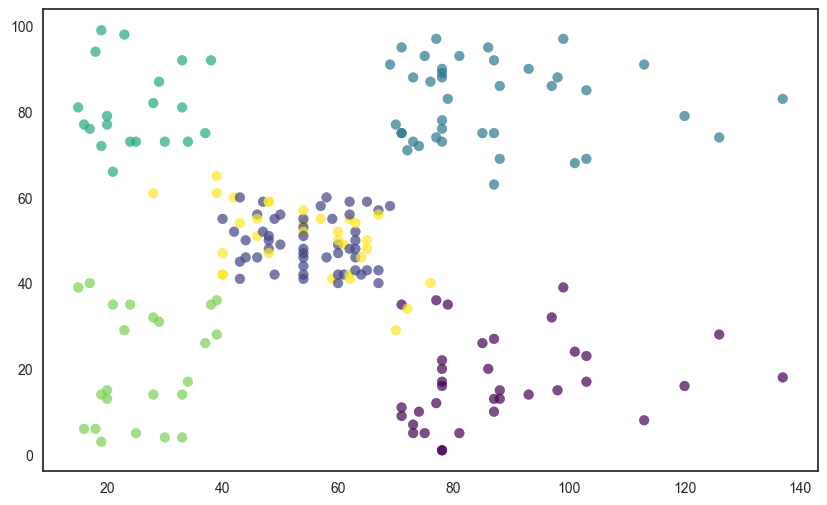

In [74]:
plt.scatter( df_1["Annual Income (k$)"], df_1["Spending Score (1-100)"], c= model1.labels_, cmap= "viridis", alpha = 0.7);

#### Age and Spending Score- X1

In [76]:
X1 = df_1.drop(["Gender", "Annual Income (k$)"], axis = 1)

In [77]:
X1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [78]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X1, model.labels_)})

f'Silhouette Score for {2} clusters {0.4549465643222241}
f'Silhouette Score for {3} clusters {0.4411791686353356}
f'Silhouette Score for {4} clusters {0.4602496389565028}
f'Silhouette Score for {5} clusters {0.40374071753059787}
f'Silhouette Score for {6} clusters {0.4125958704145705}
f'Silhouette Score for {7} clusters {0.4158977524079244}
f'Silhouette Score for {8} clusters {0.3883688959732531}
f'Silhouette Score for {9} clusters {0.3948151533262091}


In [79]:
model1 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage = "ward") #
model1.fit_predict(X1)

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

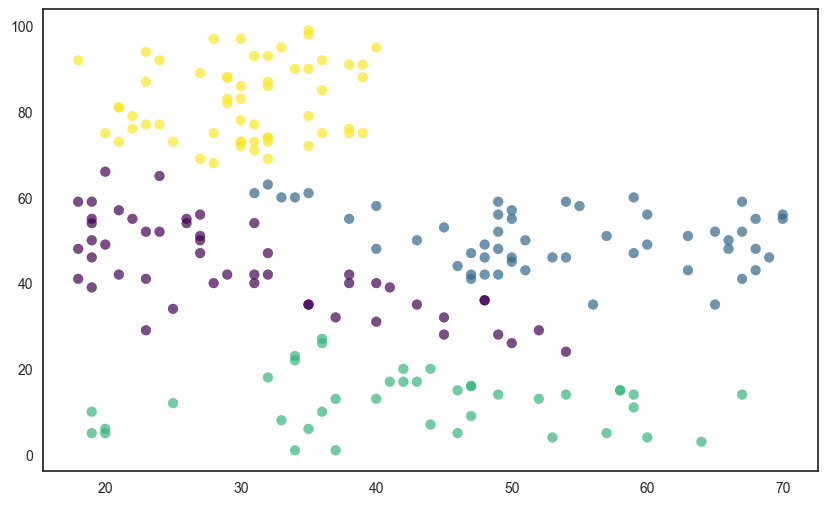

In [81]:
plt.scatter( df_1["Age"], df_1["Spending Score (1-100)"], c= model1.labels_, cmap= "viridis", alpha = 0.7);

#### Annual Income and Spending Score- X2

In [82]:
X2 = df_1.drop(["Gender", "Age"], axis = 1)

In [83]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X2, model.labels_)})

f'Silhouette Score for {2} clusters {0.36706444723912895}
f'Silhouette Score for {3} clusters {0.4618340266628975}
f'Silhouette Score for {4} clusters {0.4916598193892782}
f'Silhouette Score for {5} clusters {0.5529945955148897}
f'Silhouette Score for {6} clusters {0.5380208285578872}
f'Silhouette Score for {7} clusters {0.519904611908887}
f'Silhouette Score for {8} clusters {0.4326286245782246}
f'Silhouette Score for {9} clusters {0.43892545672004507}


In [84]:
model1 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage = "ward") #
model1.fit_predict(X2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

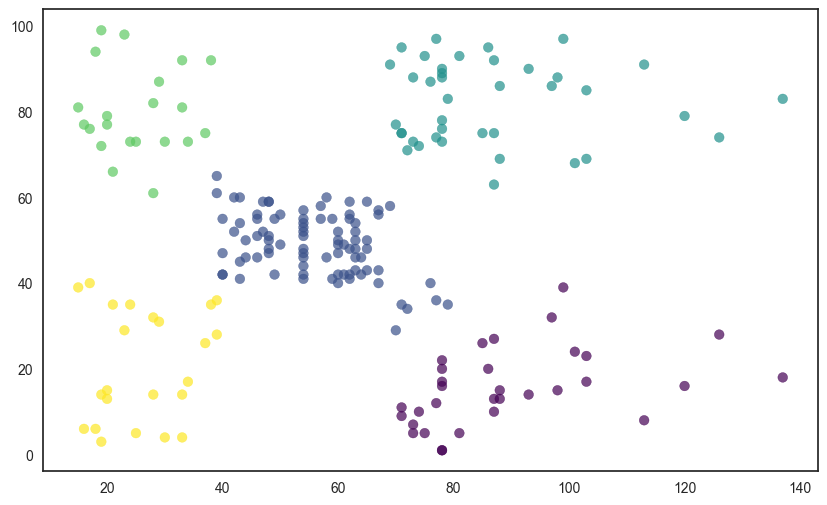

In [85]:
plt.scatter( X2["Annual Income (k$)"], X2["Spending Score (1-100)"], c= model1.labels_, cmap= "viridis", alpha = 0.7);

### iii. *Visualizing and Labeling All the Clusters* 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


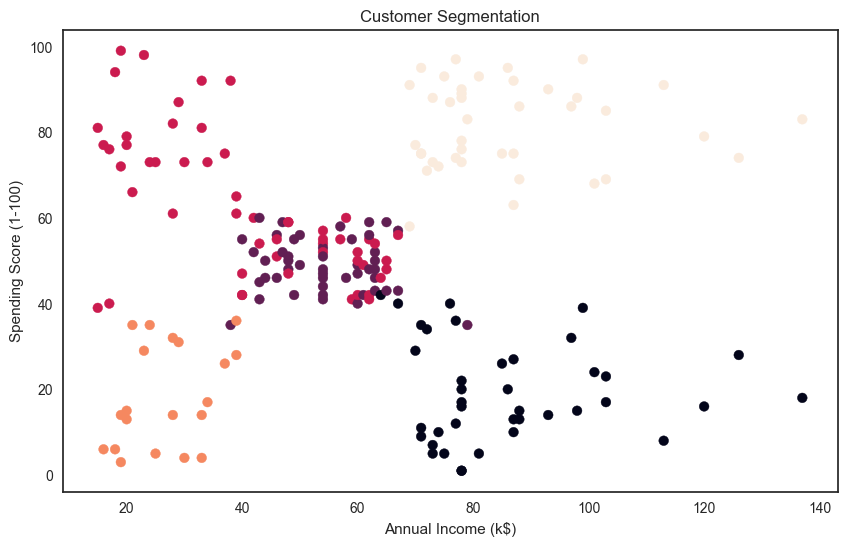

In [86]:
# Select the features to use for clustering
X = df_1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
# Normalize the features
X = (X - X.mean()) / X.std()
# Perform k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
# Add cluster labels to the customer data
df_1['Cluster'] = kmeans.labels_
# Create a scatter plot of the data colored by cluster
plt.scatter(df_1['Annual Income (k$)'], df_1['Spending Score (1-100)'], c=df_1['Cluster'])
# Add labels and a legend
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend()
# Show the plot
plt.show()

#### Age and Spending Score- X1

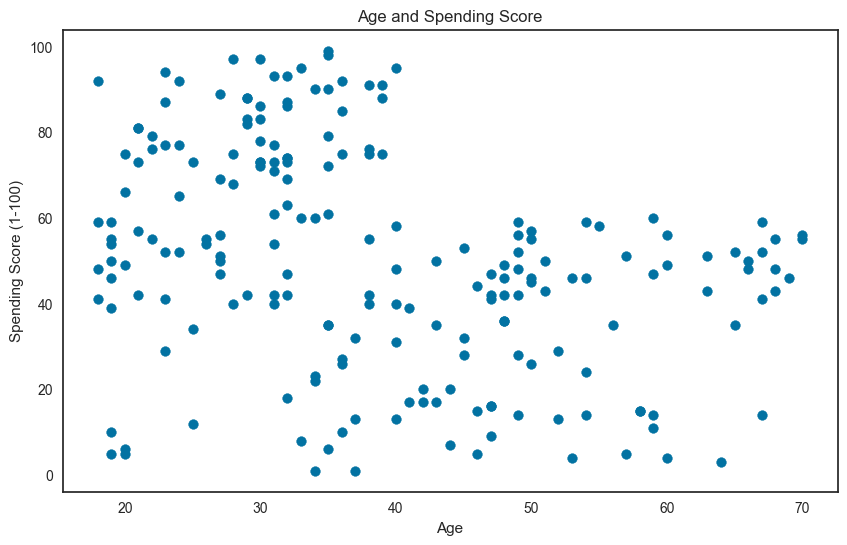

In [92]:
# Create a scatter plot of the data
plt.scatter(df_1['Age'], df_1['Spending Score (1-100)'])
# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age and Spending Score')
# Show the plot
plt.show()

#### Annual Income and Spending Score- X2

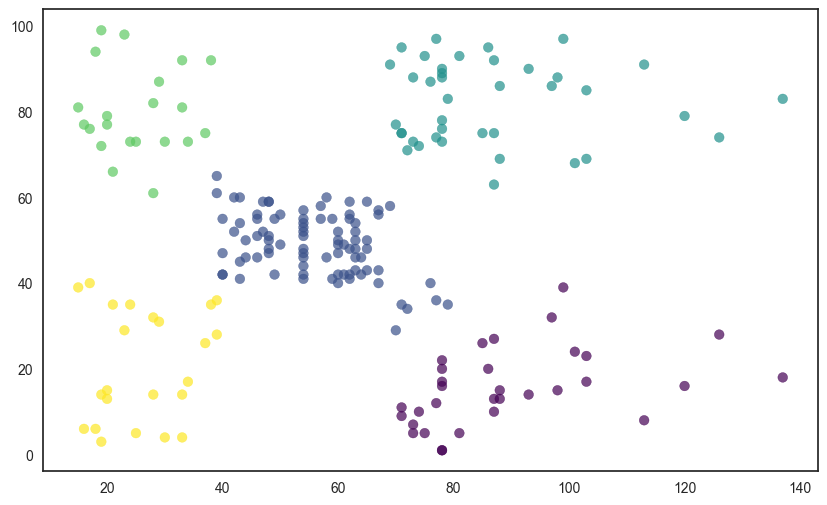

In [90]:
plt.scatter( X2["Annual Income (k$)"], X2["Spending Score (1-100)"], c= model1.labels_, cmap= "viridis", alpha = 0.7);

#### Interpretation based on Age and Spending Score- X1

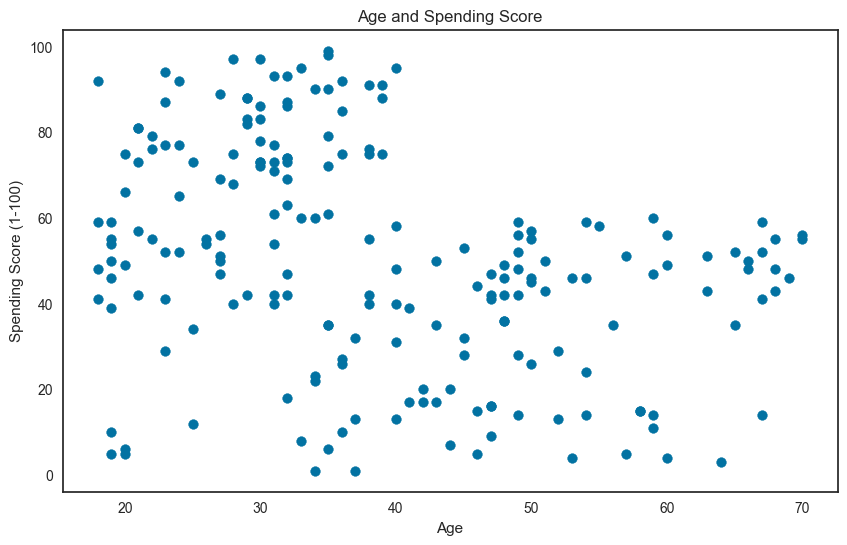

Dağılım grafiği, yaş ile harcama puanı arasında net bir ilişki olmadığını göstermektedir.Bununla birlikte, yüksek harcama puanlarına sahip ve yaşları 20 ila 40 arasında değişen bir müşteri kümesi vardır; bu da bu grubun pazarlama çabaları için önemli bir demografik grup olabileceğini göstermektedir..


In [89]:
# Create a scatter plot of the data
plt.scatter(df_1['Age'], df_1['Spending Score (1-100)'])
# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age and Spending Score')
# Show the plot
plt.show()
# Interpret the plot
print("Dağılım grafiği, yaş ile harcama puanı arasında net bir ilişki olmadığını göstermektedir.Bununla birlikte, yüksek harcama puanlarına sahip ve yaşları 20 ila 40 arasında değişen bir müşteri kümesi vardır; bu da bu grubun pazarlama çabaları için önemli bir demografik grup olabileceğini göstermektedir..")

### Conclusion

Dağılım grafiği, yaş ile harcama puanı arasında net bir ilişki olmadığını göstermektedir. Bununla birlikte, yüksek harcama puanlarına sahip ve yaşları 20 ila 40 arasında değişen bir müşteri kümesi vardır; bu da bu grubun pazarlama çabaları için önemli bir demografik grup olabileceğini göstermektedir..